# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования:** установить параметры, влияющие на рыночную стоимость объектов недвижимости в Санкт-Петербурге и соседних населённых пунктов.

**Вопросы заказчика:**

1. Сколько времени обычно занимает продажа квартиры? Какие продажи можно считать быстрыми, а какие — необычно долгими?
2. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
3. Какова средняя цена одного квадратного метра (1 м²) в населённых пунктах с наибольшим числом объявлений (топ-10)?
4. Как стоимость объектов недвижимости в Санкт-Петербурге зависит от расстояния до центра города? 

**Исходные данные:** данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

<a id="documentation"></a>
**Описание данных:**

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

<a id="1"></a>
## 1 Откройте файл с данными и изучите общую информацию.

In [1]:
# (1) импортируем библиотеки pandas и matplotlib (модуль pyplot) 

import pandas as pd
import matplotlib.pyplot as plt

# (2) сбрасываем ограничение на число выводимых столбцов таблицы

pd.set_option('display.max_columns', None)

# (3) импортируем файл CSV-формата в датафрейм

try:
    data = pd.read_csv('other/documents/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# (4) добавим разделитель разрядов и оставим 2 знака после запятой для числовых значений (тип данных: float)
    
pd.options.display.float_format = '{:,.2f}'.format

# (5) выведем первые строки таблицы

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


<a id="datainfo"></a>

In [2]:
# (6) выведем сводную информацию по всему датафрейму

data.info()

print('\nВсего строк:', data.shape[0])
print('Всего столбцов:', data.shape[1])

print('\nКоличество явных дубликатов:', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<a id="isna"></a>

In [3]:
# (7) выведем информацию по количеству пропущенных значений в каждом столбце

print(data.isna().sum())

total_isna = []
for value in data.isna().sum():
    if value != 0:
        total_isna.append(value)

print('\nКоличество столбцов с пропущенными значениями:', len(total_isna))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Количество столбцов с пропущенными значениями: 14


<a id="nameduplicates"></a>

In [4]:
# (8) сформируем список уникальных значений столбца 'locality_name' для выявления неявных дубликатов

print('Количество уникальных значений:', data['locality_name'].nunique())

print()

locality_name_sorted = data.sort_values(by='locality_name', ascending=True)
locality_name_sorted = locality_name_sorted['locality_name'].unique()

for name in locality_name_sorted:
    print(name)

Количество уникальных значений: 364

Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
городской поселок Большая Ижора
городской поселок Янино-1
городской посёлок Будогощь
городской посёлок Виллози
городской посёлок Лесогорский
городской посёлок Мга
городской посёлок Назия
городской посёлок Новоселье
городской посёлок Павлово
городской посёлок Рощино
городской посёлок Свирьстрой
городской посёлок Советский
городской посёлок Фёдоровское
городской посёлок Янино-1
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Р

<a id="histall"></a>

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

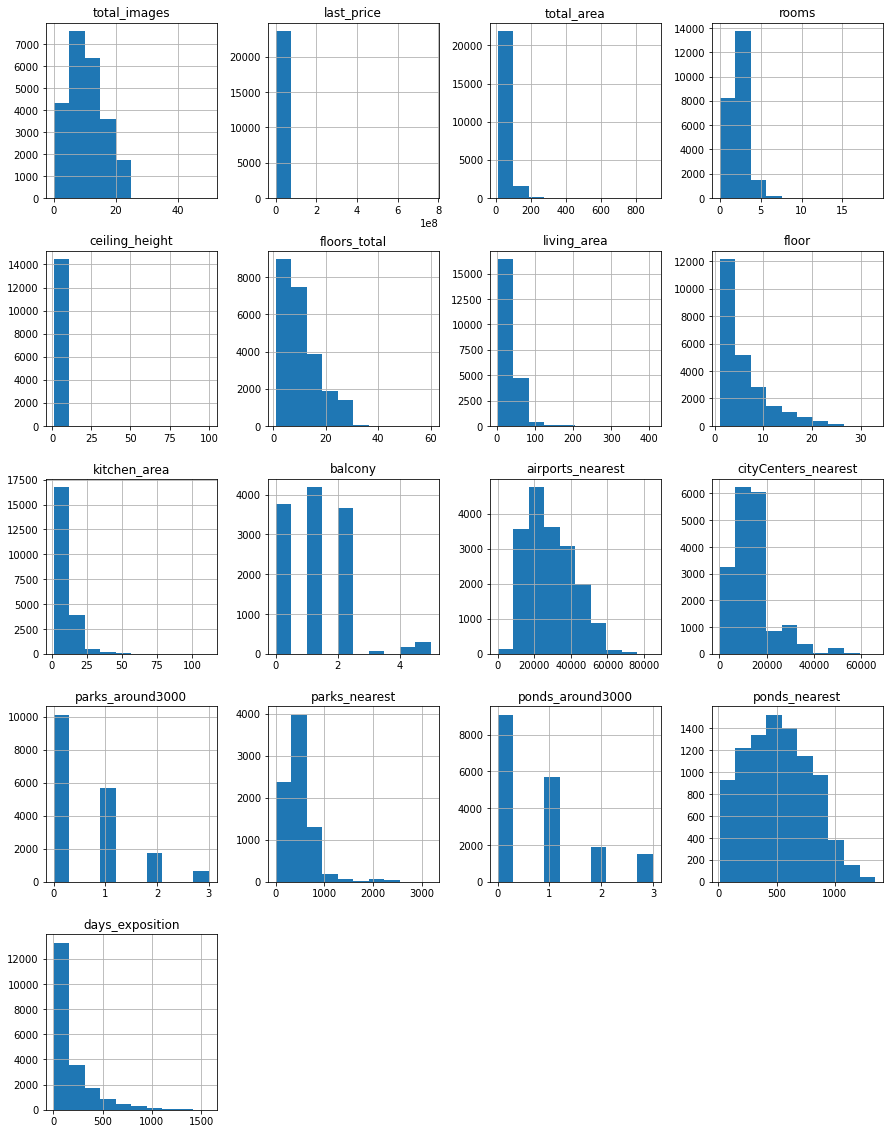

In [5]:
# (9) построим гистограмму для всех числовых столбцов таблицы на одном графике

data.hist(figsize=(15, 20))

<a id="description"></a>

In [6]:
# (10) сгенерируем описательную статистику для числовых столбцов

data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


<a id="firstresults"></a>
### <u>**Результаты и выявленные проблемы первичного анализа данных**</u>

1. Датафрейм состоит из **[23 699 строк](#datainfo)** и **[22 столбцов](#datainfo)** различных типов данных:

     * **float** (вещественные числа) - 14 столбцов;
     * **int** (целые числа) - 3 столбца;
     * **object** (текстовые или смешанные числовые и нечисловые значения) - 3 столбца;
     * **bool** (булевы значения - True/False) - 2 столбца

2. Название столбца `cityCenters_nearest` **содержит символы верхнего регистра**. Необходимо переименовать столбец в соответствии со стилем "змеиного регистра".  

3. Выявлено **[14 столбцов с пропущенными значениями](#isna)**: `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`. Обзор пропусков:

    * `ceiling_height` - **9 195 пропусков** (вероятная причина пропусков: поле для указания высоты потолков было необязательным для заполнения; но, поскольку данный параметр для большинства объектов недвижимости не сильно разнится (что подтверждают полученные данные из описательной статистики), то строки можно заполнить медианным значением);
    
    * `floors_total` - **86 пропусков** (вероятная причина пропусков: технический сбой, строки с пропусками можно исключить из анализа по причине их малого количества);
    
    * `living_area` - **1 903 пропусков** (вероятная причина пропусков: технический сбой, для заполнения строк данные описательной статистики (по столбцу) не подходят; на величину жилой площади сильнее всего влияет количество комнат, поэтому заполнить пропуски в этом столбце можно только, исходя из значений столбца `rooms`. Например, жилая площадь с 2-мя команатми ('2') должна быть заполнена медианной величиной площади среди всех записей с тем же значением);        
    
    * `is_apartment` - **20 924 пропусков** (данные пропуски логичны, так как, скорее всего, большинство объектов недвижимости - НЕ апартаменты => строки можно заполнить булевым значением "False";
    
    * `kitchen_area` - **2 278 пропусков** (данные пропуски логичны, так как продавец мог не указать метраж кухни, поскольку кухня в классическом варианте отсутствует, это может быть кухня в квартире-студии или кухня-гостинная, данные строки заполним по аналогии с `living_area`);
    
    * `balcony` - **11 519 пропусков** (данные пропуски логичны, так как в квартирах балкон может отсутствовать => строки можно заполнить нулевыми значениями (0));
    
    * `locality_name` - **49 пропусков** (вероятная причина пропусков: либо технический сбой, либо система не смогла идентифицировать населённый пункт, где располагается объект недвижимости (данные по столбцу получены автоматически на основе картографических данных); строки с пропусками можно исключить из анализа по причине их малого количества);
    
    * `airports_nearest` - **5 542 пропусков** (данные по столбцу получены автоматически на основе картографических данных; гипотетически мог произойти технический сбой, но здесь, скорее всего, аэропорт либо отсутсвует в населённом пункте (где располагается объект недвижимости), либо он находится очень далеко, а если это так, то эти значения не будут существенными при определении цен на недвижимость => строки можно оставить в текущем виде);
    
    * `cityCenters_nearest` - **5 519 пропусков** (здесь, скорее всего, пропуски объясняются тем, что объект недвижимости либо находится далеко от центра города (выше максимального значения), либо вовсе располагается в населённом пункте, который не имеет статус города => строки можно оставить в текущем виде);
    
    * `parks_around3000` - **5 518 пропусков** (данные пропуски логичны, парков в радиусе 3 км может и не быть => строки можно оставить в текущем виде);
    
    * `parks_nearest` - **15 620 пропусков** (здесь, скорее всего, пропуски объясняются тем, что объект недвижимости либо находится далеко от ближайшего парка (выше максимального значения, либо вовсе располагается в населённом пункте, где парки отсутствуют => строки можно оставить в текущем виде);
    
    * `ponds_around3000` - **5 518 пропусков** (данные пропуски логичны, прудов в радиусе 3 км может и не быть (стоит отметить, что число пропусков с данными о прудах в радиусе 3 км совпадает с числом пропусков с данными о парках в радиусе 3 км, но и в этом случае есть логика: как правило пруды располагаются в парках) => строки можно оставить в текущем виде)
    
    * `ponds_nearest` - **14 589 пропусков** (здесь, скорее всего, пропуски объясняются тем, что объект недвижимости либо находится далеко от ближайшего пруда (выше максимального значения, либо вовсе располагается в населённом пункте, где пруды отсутствуют => строки можно оставить в текущем виде);
    
    * `days_exposition` - **3 181 пропусков** (пропуски могли возникнуть из-за того, что либо объявление ещё не было опубликовано, либо объявление ещё не сняли с показа => строки можно оставить в текущем виде.

4. Наблюдается **несоответствие [типа данных](#datainfo) столбцов описанию из [документации](#documentation)**:

    * `first_day_exposition` - текущий тип данных **object** (текстовые или смешанные числовые и нечисловые значения) необходимо заменить на **datetime** (дата и время);
    * `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000` и `days_exposition` - текущий тип данных **float** (вещественные числа) необходимо заменить на **int** (целые числа);
    * `is_apartment` - текущий тип данных **object** (текстовые или смешанные числовые и нечисловые значения) необходимо заменить на **bool** (булевы значения - True/False); 

(*) В столбцах `parks_around3000`, `ponds_around3000` и `days_exposition` тип данных останется прежним, так как принято решение не заполнять пропущенные значения (размах выборки большой, поэтому заполнение пропусков может привести к тому, что данные окажутся неактуальными).

5. **Явных дубликатов НЕ выявлено**;

5. **Выявлены неявные дубликаты** в столбце `locality_name` в названиях населённых пунктов:

    * дубликаты из-за дополнительного идентификатора (напр., *"Мурино-<u>посёлок</u> Мурино"* или *"Никольское-<u>село</u> Никольское"*);
    * дубликаты из-за использования буквы "е" вместо "ё" (напр. *"пос<u>е</u>лок Усть-Луга-пос<u>ё</u>лок Усть-Луга"*);
    * дубликаты из-за неправильного написания типа населённого пункта ("<u>городской посёлок</u> Лесогорский и <u>поселок городского типа</u> Лесогорский")

7. **В [документации](#documentation) отсутствует денежная единица измерения** в столбце `last_price`. По умолчанию будем считать, что цена квартир измеряется в рублях (руб.).

8. Полученные **[гистограммы](#histall)** и данные **[описательной статистики](#description)**  наглядно демонстрируют, что **в некоторых столбцах присутствуют аномальные значения (артефакты)**, например, в столбце `last_price` минимальная цена квартиры - 12 190 руб., в столбце`rooms` есть строки, где количество комнат равно 0, в столбце `ceiling_height` максимальная высота потолка - 100 метров, в столбце`living_area` минимальная жилая площадь - 2 м², в столбце`kitchen_area` - минимальная площадь кухни - 1,3 м² и т.д. Необходим исследовательский анализ данных.

In [7]:
rz = data.shape[0]
rz

23699

## 2 Предобработка данных

### Переименование столбцов

Переименуем название столбца `cityCenters_nearest` в соответствии со стилем "змеиного регистра":

In [8]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

**Вывод:** столбец переименован, теперь все столбцы соответствуют "змеиному регистру".

### Обработка пропущенных значений

По результатам первичного анализа выявлено **[14 столбцов с пропущенными значениями](#isna)**. Заполним пропущенные пропуски в тех столбцах, где это необходимо и уместно:

**`ceiling_height`** (вероятная причина пропусков: поле для указания высоты потолков было необязательным для заполнения; но, поскольку данный параметр для большинства объектов недвижимости не сильно разнится (что подтверждают полученные данные из описательной статистики), то строки можно заполнить медианным значением)

In [9]:
# заполним пропуски медианным значением в столбце 'ceiling_height'

median_ceiling_height = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(median_ceiling_height)

---
**`living_area`** (вероятная причина пропусков: технический сбой, для заполнения строк данные описательной статистики (по столбцу) не подходят; на величину жилой площади сильнее всего влияет количество комнат, поэтому заполнить пропуски в этом столбце можно только, исходя из значений столбца `rooms`. Например, жилая площадь с 2-мя команатми ('2') должна быть заполнена медианной величиной площади среди всех записей с тем же значением)

In [10]:
# при помощи коэффициента корреляции Пирсона убедимся, что данные столбца `rooms` оказывают сильное влияние на столбец 'living_area'

data['living_area'].corr(data['rooms'])

0.8459774567888745

84% - высокий коэффициент корреляции => связь между переменными сильная

In [11]:
# посчитаем медианную величину жилой площади, соответствующей определённому значению в столбце 'rooms' и заполним пропуски столбца 'living_area';

for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()

---
**`is_apartment`** (данные пропуски логичны, так как, скорее всего, большинство объектов недвижимости - НЕ апартаменты => строки можно заполнить булевым значением "False")

In [12]:
# выведем уникальные значения столбца `is_apartment`

data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [13]:
# посчитаем соотношение аппартаментов и НЕ аппартаментов

share_apartaments = data.groupby('is_apartment')['rooms'].count()
share_apartaments

is_apartment
False    2725
True       50
Name: rooms, dtype: int64

В первоначальных данных количество апартаментов насчитывалось всего 50 штук, поэтому пропуски заполняем буелвым значением False.

In [14]:
# заполним пропуски булевым значением False в столбце 'is_apartment'

data['is_apartment'] = data['is_apartment'].fillna(value=False)

---
**`kitchen_area`** (данные пропуски логичны, так как продавец мог не указать метраж кухни, поскольку кухня в классическом варианте отсутствует, это может быть кухня в квартире-студии или кухня-гостинная, данные строки заполним по аналогии с `living_area`)

In [15]:
# посчитаем медианную величину жилой площади, соответствующей определённому значению в столбце 'rooms' и заполним пропуски столбца 'kitchen_area':

kitchen_area = data.groupby('rooms')['kitchen_area'].median()

for t in data['rooms'].unique():
    data.loc[((data['kitchen_area'].isna()) & (data['rooms'] == t)), 'kitchen_area'] = kitchen_area[t]

---
**`balcony`** (данные пропуски логичны, так как в квартирах балкон может отсутствовать => строки можно заполнить нулевыми значениями (0))

In [16]:
# заполним пропуски нулевыми значениями в столбце 'balcony'

data['balcony'] = data['balcony'].fillna(value=0)

---
**`airports_nearest`** (данные по столбцу получены автоматически на основе картографических данных; гипотетически мог произойти технический сбой, но здесь, скорее всего, аэропорт либо отсутсвует в населённом пункте (где располагается объект недвижимости), либо он находится очень далеко, а если это так, то эти значения не будут существенными при определении цен на недвижимость => строки можно оставить в текущем виде)

In [17]:
# строки оставляем в текущем виде

---
**`city_centers_nearest`** (ранее **`cityCenters_nearest`**) (здесь, скорее всего, пропуски объясняются тем, что объект недвижимости либо находится далеко от центра города (выше максимального значения), либо вовсе располагается в населённом пункте, который не имеет статус города => строки можно оставить в текущем виде)

In [18]:
# строки оставляем в текущем виде

---
**`parks_around3000`** (данные пропуски логичны, парков в радиусе 3 км может и не быть => строки можно оставить в текущем виде)

In [19]:
# строки оставляем в текущем виде

---
**`parks_nearest`** (здесь, скорее всего, пропуски объясняются тем, что объект недвижимости либо находится далеко от ближайшего парка (выше максимального значения, либо вовсе располагается в населённом пункте, где парки отсутствуют => строки можно оставить в текущем виде)

In [20]:
# строки оставляем в текущем виде

---
**`ponds_around3000`** (данные пропуски логичны, прудов в радиусе 3 км может и не быть (стоит отметить, что число пропусков с данными о прудах в радиусе 3 км совпадает с числом пропусков с данными о парках в радиусе 3 км, но и в этом случае есть логика: как правило пруды располагаются в парках) => строки можно оставить в текущем виде)

In [21]:
# строки оставляем в текущем виде

---
**`ponds_nearest`** (здесь, скорее всего, пропуски объясняются тем, что объект недвижимости либо находится далеко от ближайшего пруда (выше максимального значения, либо вовсе располагается в населённом пункте, где пруды отсутствуют => строки можно оставить в текущем виде)

In [22]:
# строки оставляем в текущем виде

---
**`days_exposition`** (пропуски могли возникнуть из-за того, что либо объявление ещё не было опубликовано, либо объявление ещё не сняли с показа => строки можно оставить в текущем виде)

In [23]:
# строки оставляем в текущем виде

Теперь удалим строки с пропущенными значениями (решение по удалению строк принято по причине их малого количества, подробные комментарии см. в [предыдущем разделе](#firstresults)):

**`floors_total`** (вероятная причина пропусков: технический сбой, строки с пропусками можно исключить из анализа по причине их малого количества)

In [24]:
# удаляем строки с пропущенными значениями в столбце 'floors_total'

data.dropna(subset=['floors_total'], inplace=True)

---
**`locality_name`** (вероятная причина пропусков: либо технический сбой, либо система не смогла идентифицировать населённый пункт, где располагается объект недвижимости (данные по столбцу получены автоматически на основе картографических данных); строки с пропусками можно исключить из анализа по причине их малого количества)

In [25]:
# удаляем строки с пропущенными значениями в столбце 'locality_name'

data.dropna(subset=['locality_name'], inplace=True)

---
Убедимся в том, что таблица с подсчётом пропусков обновлена, сравним новый вариант с [первоначальной версией](#isna):

In [26]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              194
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

**Вывод:** таблица с подсчётом пропусков обновлена, пропуски устранены (там, где была необходимость). В столбце `kitchen_area` остались пустые значение. Это произошло из-за квартир с 0 комнатами. Оставим данные строки для анализа.

### Изменение типа данных

Изменим тип данных столбцов, чтобы они соответствовали описанию из [документации](#documentation). Это необходимо для того, чтобы значения проще было интерпретировать и использовать для дальнейшего анализа.

In [27]:
# (1) изменим тип данных **object** (текстовые или смешанные числовые и нечисловые значения) на **datetime** (дата и время) в столбце `first_day_exposition'

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# (2) изменим тип данных **float** (вещественные числа) на **int** (целые числа) в столбцах `floors_total`, `balcony`

data['floors_total'] = data['floors_total'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')

# (3) изменим тип данных **object** (текстовые или смешанные числовые и нечисловые значения) на **bool** (булевы значения - True/False) в столбце `is_apartment`

data['is_apartment'] = data['is_apartment'].astype('bool')

Проверим, что данные изменены: выведем обновлённую сводную информацию по всему датафрейму и сравним с [первоначальным сводом](#datainfo):

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23371 non-null  float64       
 13  balcony         

**Вывод:** тип данных в столбцах изменён.

### Устранение дубликатов

Обработаем и устраним **неявные дубликаты** в столбце `locality_name` в названиях населённых пунктов (см. подробнее в [предыдущем разделе](#nameduplicates)):

* дубликаты из-за дополнительного идентификатора (напр., *"Мурино-<u>посёлок</u> Мурино"* или *"Никольское-<u>село</u> Никольское"*);
* дубликаты из-за использования буквы "е" вместо "ё" (напр. *"пос<u>е</u>лок Усть-Луга-пос<u>ё</u>лок Усть-Луга"*);
* дубликаты из-за неправильного написания типа населённого пункта ("<u>городской посёлок</u> Лесогорский и <u>поселок городского типа</u> Лесогорский")

In [29]:
# (1) приведём значения к нижнему регистру

data['locality_name'] = data['locality_name'].str.lower()

# (2) заменим букву "е" на "ё" в слове "посёлок"

data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

# (3) заменим тип населённого пункта "городской посёлок" на "посёлок городского типа" и
#     заменим тип населённого пункта "посёлок станции" на "посёлок при железнодорожной станции"

data['locality_name'] = data['locality_name'].str.replace('городской посёлок','посёлок городского типа')
data['locality_name'] = data['locality_name'].str.replace('посёлок станции','посёлок при железнодорожной станции')

# (4) точечная замена

data['locality_name'] = data['locality_name'].str.replace('посёлок громово','посёлок при железнодорожной станции громово')
data['locality_name'] = data['locality_name'].str.replace('посёлок любань','любань')
data['locality_name'] = data['locality_name'].str.replace('посёлок мурино','мурино')
data['locality_name'] = data['locality_name'].str.replace('село никольское','никольское')
data['locality_name'] = data['locality_name'].str.replace('деревня кудрово','кудрово')

# (5) заново сформируем список уникальных значений столбца 'locality_name'

print('Количество уникальных значений:', data['locality_name'].nunique())

print()

locality_name_sorted_new = data.sort_values(by='locality_name', ascending=True)
locality_name_sorted_new = locality_name_sorted_new['locality_name'].unique()

for name in locality_name_sorted_new:
    print(name)

Количество уникальных значений: 316

бокситогорск
волосово
волхов
всеволожск
выборг
высоцк
гатчина
деревня агалатово
деревня аро
деревня батово
деревня бегуницы
деревня белогорка
деревня большая вруда
деревня большая пустомержа
деревня большие колпаны
деревня большое рейзино
деревня большой сабск
деревня бор
деревня борисова грива
деревня ваганово
деревня вартемяги
деревня вахнова кара
деревня выскатка
деревня гарболово
деревня глинка
деревня горбунки
деревня гостилицы
деревня заклинье
деревня заневка
деревня зимитицы
деревня извара
деревня иссад
деревня калитино
деревня кальтино
деревня камышовка
деревня каськово
деревня келози
деревня кипень
деревня кисельня
деревня колтуши
деревня коркино
деревня котлы
деревня кривко
деревня кузьмолово
деревня курковицы
деревня куровицы
деревня куттузи
деревня лаврики
деревня лаголово
деревня лампово
деревня лесколово
деревня лопухинка
деревня лупполово
деревня малая романовка
деревня малое верево
деревня малое карлино
деревня малые колпаны
деревня 

**Вывод:** неявные дубликаты устранены, количество уникальных значений столбца `locality_name` сократилось с 364 до 316.

<a id="preprocessingresults"></a>
### <u>**Результаты предобработки данных**</u>

1. Столбец `cityCenters_nearest` переименован в `city_centers_nearest`. Теперь **все столбцы соответствуют "змеиному регистру"**.

2. Был проведён анализ пропусков в 14 столбцах: выдвинуты гипотезы по причинам их возникновения и приняты решения по дальнейшей работе с ними. **Пропущенные значения заполнены** в тех местах, где в этом была необходимость. **Удалены пропущенные строки** в столбцах `floors_total` и `locality_name` из-за их малого количества.

3. **Тип данных** в столбцах `first_day_exposition`, `floors_total`, `balcony` и `is_apartment` **изменён**. Теперь они соответствуют описанию из [документации](#documentation), и их можно использовать для дальнейшего анализа.   

4. **Устранены неявные дубликаты** в названиях населённых пунктов в столбце `locality_name`. Количество уникальных значений сократилось с 364 до 316.

5. **Обновлённый свод информации о датафрейме**:

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23371 non-null  float64       
 13  balcony         

6. После проведённых манпуляций датафрейм имеет следующие параметры: **23 565 строки** и **22 столбца** (включая **8 столбцов с пропусками**):

   * **float** (вещественные числа) - 12 столбцов;
   * **int** (целые числа) - 5 столбцов;
   * **bool** (булевы значения - True/False) - 3 столбца
   * **object** (текстовые или смешанные числовые и нечисловые значения) - 1 столбец;
   * **datetime** (дата и время) - 1 столбец.     

## 3 Посчитайте и добавьте в таблицу новые столбцы

### Цена одного квадратного метра

In [31]:
# добавим столбец 'price_per_square_meter' (цена одного квадратного метра)

data['price_per_square_meter'] = data['last_price'] / data['total_area']

In [32]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37"
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79"
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,санкт-петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71"
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,45.00,9,False,False,False,9.50,0,санкт-петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10"
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00"


### День недели, месяц и год публикации объявления

In [33]:
# (1) добавим столбец 'day_publication' (день недели публикации объявления)

data['day_publication'] = data['first_day_exposition'].dt.weekday

# (2) добавим столбец 'month_publication' (месяц публикации объявления)

data['month_publication'] = data['first_day_exposition'].dt.month

# (3) добавим столбец 'year_publication' (год публикации объявления)

data['year_publication'] = data['first_day_exposition'].dt.year

### Тип этажа квартиры

In [34]:
# создадим функцию для заполнения нового столбца 'floor_type' (тип этажа квартиры)

def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor, axis=1)

### Расстояние до центра города в километрах

In [35]:
# добавим столбец 'distance_city_center_km' (расстояние до центра города в километрах) и
# округлим его до ближайших целых значений

data['distance_city_center_km'] = round(data['city_centers_nearest'] / 1000)

### <u>**Результат**</u>

Добавлено **6 новых столбцов:**

* `price_per_square_meter` (цена одного квадратного метра)
* `day_publication` (день недели публикации объявления)
* `month_publication` (месяц публикации объявления)
* `year_publication` (год публикации объявления)
* `floor_type` (тип этажа квартиры)
* `distance_city_center_km` (расстояние до центра города в километрах)

**Обновлённый датафрейм:**

In [36]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_publication,month_publication,year_publication,floor_type,distance_city_center_km
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37",3,3,2019,другой,16.00
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79",1,12,2018,первый,19.00
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,санкт-петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",3,8,2015,другой,14.00
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,45.00,9,False,False,False,9.50,0,санкт-петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",4,7,2015,другой,7.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",1,6,2018,другой,8.00


## 4 Проведите исследовательский анализ данных

<a id="parameters"></a>
### Изучение основных параметров и устранение выбросов

По **[результатам первичного анализа](#firstresults)** было усатновлено, что в **некоторых столбцах присутствуют аномальные значения (артефакты)**. Теперь необходимо провести исследовательский анализ данных, конечным результатом которого станет получение достаточно полного представления о природе данных, а также будут устранены все выявленные выбросы.

Параметры для исследования:

- общая площадь ([`total_area`](#total_area));
- жилая площадь ([`living_area`](#living_area));
- площадь кухни ([`kitchen_area`](#kitchen_area));
- цена объекта ([`last_price`](#last_price));
- количество комнат ([`rooms`](#rooms));
- высота потолков ([`ceiling_height`](#ceiling_height));
- этаж квартиры ([`floor`](#floor));
- тип этажа квартиры («первый», «последний», «другой») ([`floor_type`](#floor_type));
- общее количество этажей в доме ([`floors_total`](#floors_total));
- расстояние до центра города в метрах ([`city_centers_nearest`](#city_centers_nearest)) - *картографические данные*;
- расстояние до ближайшего аэропорта ([`airports_nearest`](#airports_nearest)) - *картографические данные*;
- расстояние до ближайшего парка ([`parks_nearest`](#parks_nearest)) - *картографические данные*;
- день, месяц и год публикации объявления ([`day_publication`, `month_publication` и `year_publication`](#publication)).

**Общая площадь (`total_area`)** <a id="total_area"></a>

In [37]:
# (1) выведем данные описательной статистики

print('Описательная статистика:')
data['total_area'].describe()

Описательная статистика:


count   23,565.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

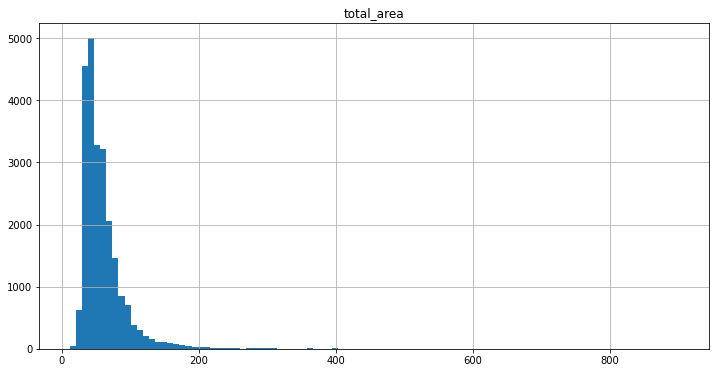

In [38]:
# (2) построим гистограмму

data.hist('total_area', bins=100, figsize=(12,6))

(0.0, 200.0)

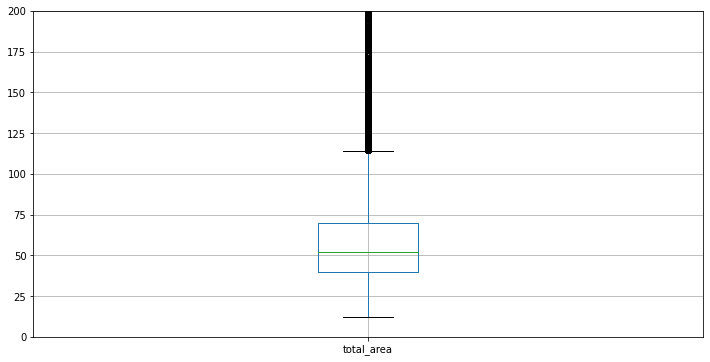

In [39]:
# (3) построим диаграмму размаха

data.boxplot(column=['total_area'], figsize=(12,6), grid=True)
plt.ylim(0, 200)

In [40]:
# (4) рассчитаем верхнюю границу 1,5 межквартильного размаха

q_lower = data['total_area'].quantile(0.25)
q_upper = data['total_area'].quantile(0.75)
iqr = q_upper - q_lower
print('Верхняя граница 1.5 межквартильного размаха:', 1.5 * iqr + q_upper)

Верхняя граница 1.5 межквартильного размаха: 114.25


<u>**Промежуточный вывод:**</u> для анализа следуют отобрать значения **от 10 до 114** (согласно гистограмме эти значения встречаются чаще всего, и они находятся в пределах "ящика с усами", т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR).

Сделаем срез данных и на их основе построим новую гистограмму и диаграмму размаха.

In [41]:
# (4) сделаем срез данных, сохраним результат в переменной df и выведем обновлённую описательную статистику

df = data.query('total_area > 10 & total_area < 114').reset_index(drop=True)
df['total_area'].describe()

count   22,299.00
mean        54.25
std         19.23
min         12.00
25%         39.40
50%         50.00
75%         65.40
max        113.90
Name: total_area, dtype: float64

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

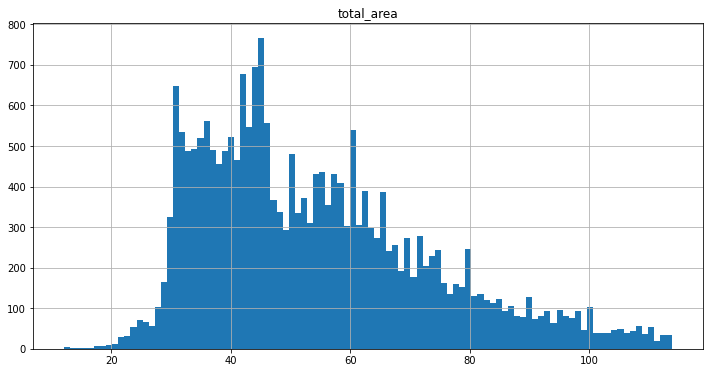

In [42]:
# (5) построим новую гистограмму

df.hist('total_area', bins=100, figsize=(12,6))

<u>**Вывод:**</u> данные из столбца можно использовать для анализа.

---
**Жилая площадь (`living_area`)** <a id="living_area"></a>

In [43]:
# (1) выведем данные описательной статистики

print('Описательная статистика:')
data['living_area'].describe()

Описательная статистика:


count   23,565.00
mean        34.32
std         21.72
min          2.00
25%         18.40
50%         30.30
75%         42.70
max        409.70
Name: living_area, dtype: float64

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

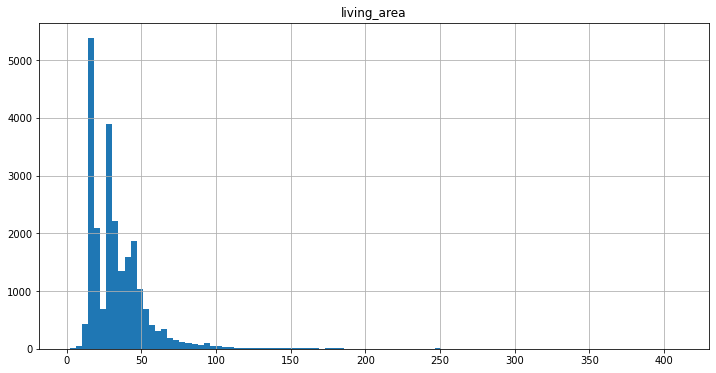

In [44]:
# (2) построим гистограмму

data.hist('living_area', bins=100, figsize=(12,6))

(0.0, 100.0)

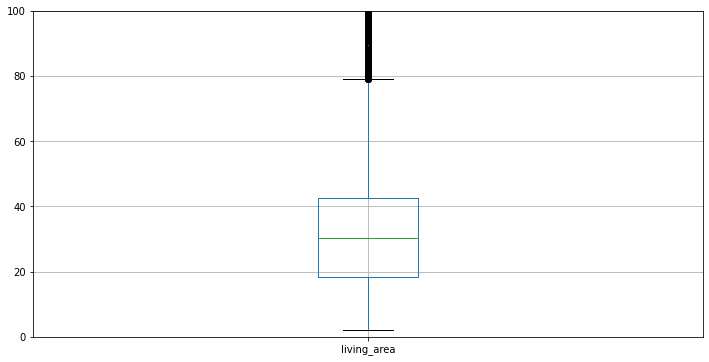

In [45]:
# (3) построим диаграмму размаха

data.boxplot(column=['living_area'], figsize=(12,6), grid=True)
plt.ylim(0, 100)

<u>**Промежуточный вывод:**</u> для анализа следуют отобрать значения **от 5 до 75** (согласно гистограмме эти значения встречаются чаще всего, и они находятся в пределах "ящика с усами", т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR).

In [46]:
# (4) сделаем срез данных, сохраним результат в переменной df и выведем обновлённую описательную статистику

df = data.query('living_area > 5 & living_area < 75').reset_index(drop=True)
df['living_area'].describe()

count   22,647.00
mean        31.32
std         13.56
min          5.40
25%         18.10
50%         30.00
75%         41.00
max         74.99
Name: living_area, dtype: float64

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

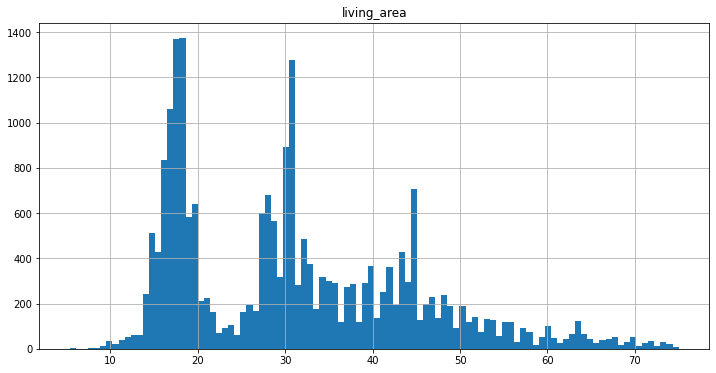

In [47]:
# (5) построим новую гистограмму

df.hist('living_area', bins=100, figsize=(12,6))

<AxesSubplot:>

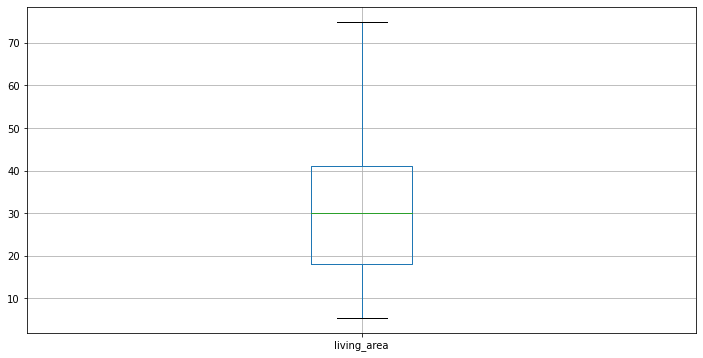

In [48]:
# (6) построим новую диаграмму размаха

df.boxplot(column=['living_area'], figsize=(12,6), grid=True)

<u>**Вывод:**</u> теперь все значения находятся в пределах "ящика с усами" (т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR) и ни одно из них не является аномальным => данные из столбца можно использовать для анализа.

---
**Площадь кухни (`kitchen_area`)** <a id="kitchen_area"></a>

In [49]:
# (1) выведем данные описательной статистики

print('Описательная статистика:')
data['kitchen_area'].describe()

Описательная статистика:


count   23,371.00
mean        10.46
std          5.66
min          1.30
25%          7.30
50%          9.04
75%         11.50
max        112.00
Name: kitchen_area, dtype: float64

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

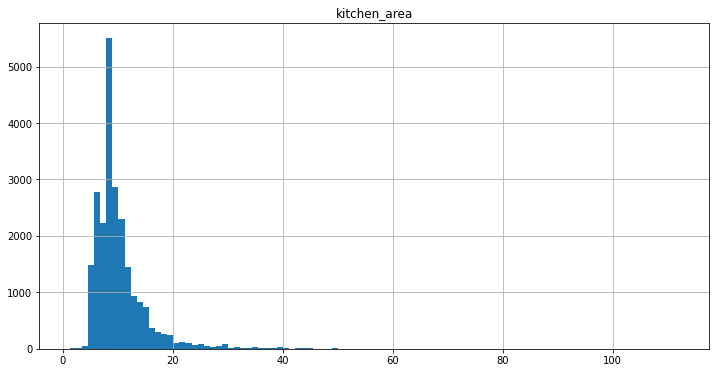

In [50]:
# (2) построим гистограмму

data.hist('kitchen_area', bins=100, figsize=(12,6))

(0.0, 20.0)

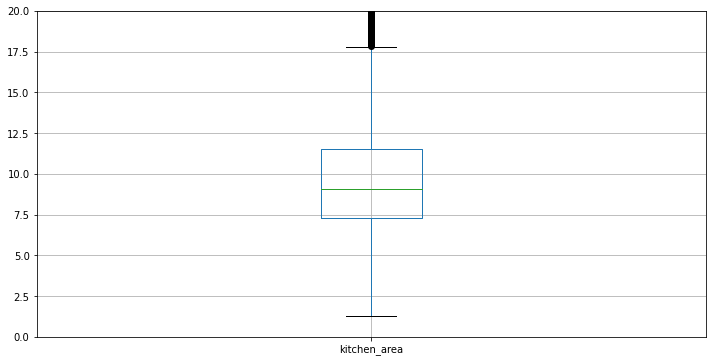

In [51]:
# (3) построим диаграмму размаха

data.boxplot(column=['kitchen_area'], figsize=(12,6), grid=True)
plt.ylim(0, 20)

<u>**Промежуточный вывод:**</u> для анализа следуют отобрать значения **от 2 до 17** (согласно гистограмме эти значения встречаются чаще всего, и они находятся в пределах "ящика с усами", т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR).

In [52]:
# (4) сделаем срез данных, сохраним результат в переменной df и выведем обновлённую описательную статистику

df = data.query('kitchen_area > 2 & kitchen_area < 17 or kitchen_area.isna()').reset_index(drop=True)
df['kitchen_area'].describe()

count   21,582.00
mean         9.26
std          2.69
min          2.30
25%          7.00
50%          9.00
75%         11.00
max         16.92
Name: kitchen_area, dtype: float64

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

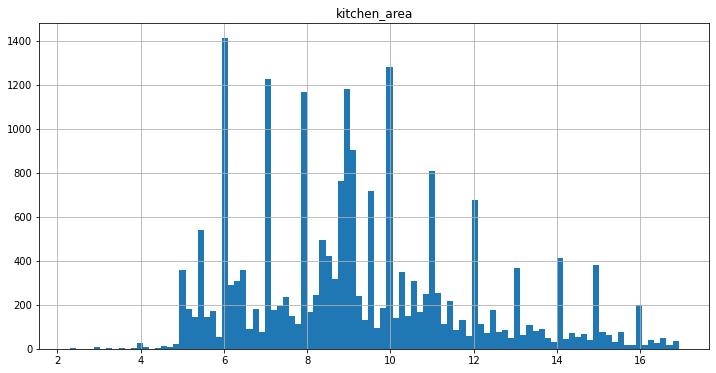

In [53]:
# (5) построим новую гистограмму

df.hist('kitchen_area', bins=100, figsize=(12,6))

<AxesSubplot:>

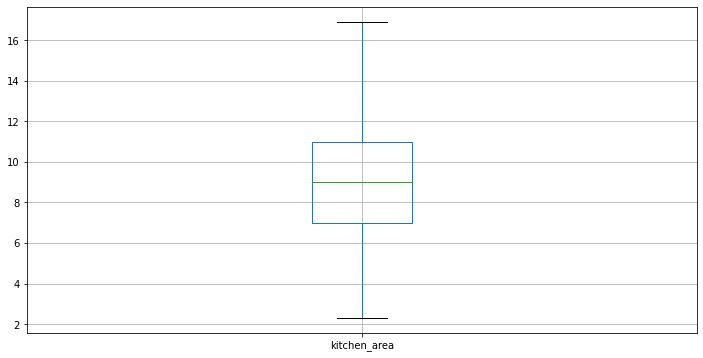

In [54]:
# (6) построим новую диаграмму размаха

df.boxplot(column=['kitchen_area'], figsize=(12,6), grid=True)

<u>**Вывод:**</u> теперь все значения находятся в пределах "ящика с усами" (т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR) и ни одно из них не является аномальным => данные из столбца можно использовать для анализа.

---
**Цена объекта (`last_price`)** <a id="last_price"></a>

In [55]:
# (1) выведем данные описательной статистики

print('Описательная статистика:')
data['last_price'].describe()

Описательная статистика:


count        23,565.00
mean      6,540,058.26
std      10,910,934.72
min          12,190.00
25%       3,400,000.00
50%       4,646,000.00
75%       6,790,000.00
max     763,000,000.00
Name: last_price, dtype: float64

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

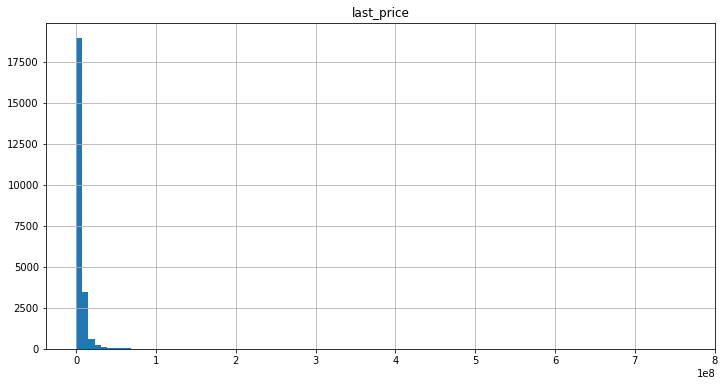

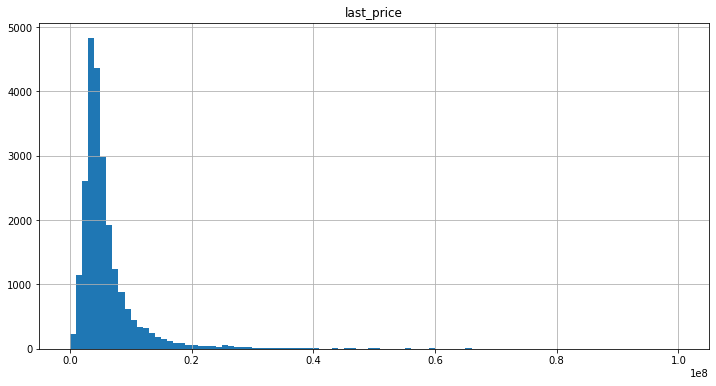

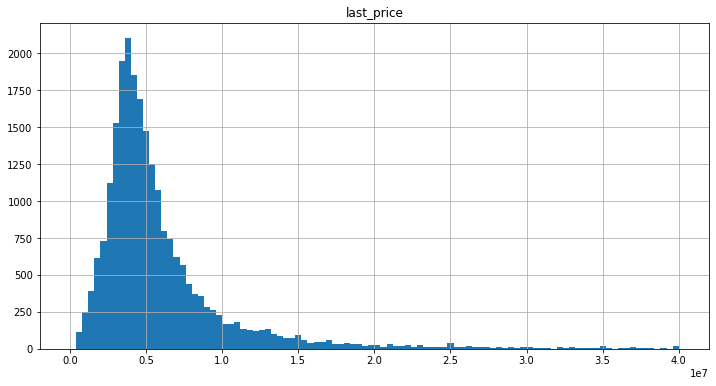

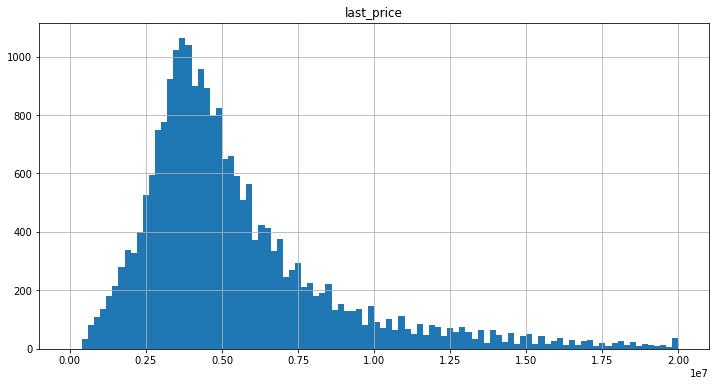

In [56]:
# (2.1) построим гистограмму

data.hist('last_price', bins=100, figsize=(12,6))

# (2.2) изменим параметры гистограммы для более качественной визуализации

data.hist('last_price', bins=100, figsize=(12,6), range=(0,100_000_000))

# (2.3) повторно изменим параметры гистограммы для более качественной визуализации

data.hist('last_price', bins=100, figsize=(12,6), range=(0,40_000_000))

# (2.4) повторно изменим параметры гистограммы для более качественной визуализации

data.hist('last_price', bins=100, figsize=(12,6), range=(0,20_000_000))

(0.0, 20000000.0)

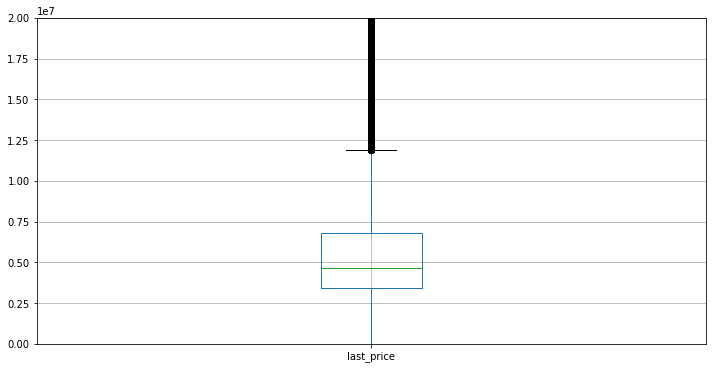

In [57]:
# (3) построим диаграмму размаха

data.boxplot(column=['last_price'], figsize=(12,6), grid=True)
plt.ylim(0, 20_000_000)

In [58]:
# (4) рассчитаем верхнюю границу 1,5 межквартильного размаха

q_lower = data['last_price'].quantile(0.25)
q_upper = data['last_price'].quantile(0.75)
iqr = q_upper - q_lower
print('Верхняя граница 1.5 межквартильного размаха:', 1.5 * iqr + q_upper)

Верхняя граница 1.5 межквартильного размаха: 11875000.0


<u>**Промежуточный вывод:**</u> для анализа следуют отобрать значения **от 430 000 до 11 875 000** (согласно гистограмме эти значения встречаются чаще всего, и они находятся в пределах "ящика с усами", т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR).

In [59]:
# (5) сделаем срез данных, сохраним результат в переменной df и выведем обновлённую описательную статистику

df = data.query('last_price > 430_000 & last_price < 11_875_000').reset_index(drop=True)
df['last_price'].describe()

count       21,516.00
mean     4,837,748.46
std      2,215,276.36
min        440,000.00
25%      3,300,000.00
50%      4,400,000.00
75%      6,000,000.00
max     11,866,860.00
Name: last_price, dtype: float64

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

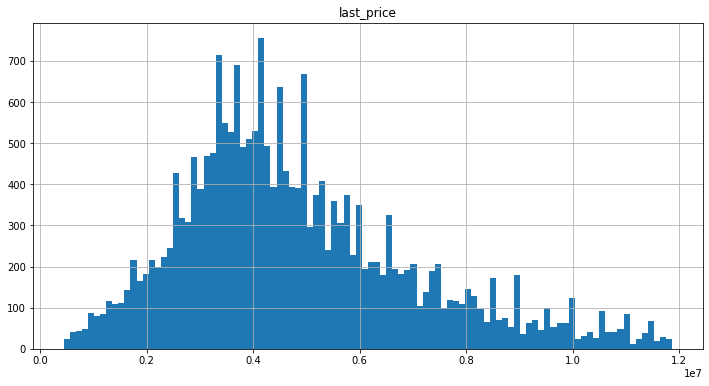

In [60]:
# (5) построим новую гистограмму

df.hist('last_price', bins=100, figsize=(12,6))

<u>**Вывод:**</u> данные можно использовать для анализа.

---
**Количество комнат (`rooms`)** <a id="rooms"></a>

In [61]:
# (1) выведем данные описательной статистики

print('Описательная статистика:')
data['rooms'].describe()

Описательная статистика:


count   23,565.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

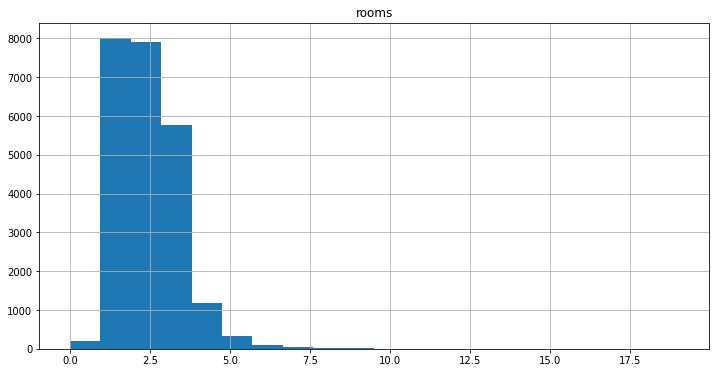

In [62]:
# (2) построим гистограмму

data.hist('rooms', bins=20, figsize=(12,6))

<AxesSubplot:>

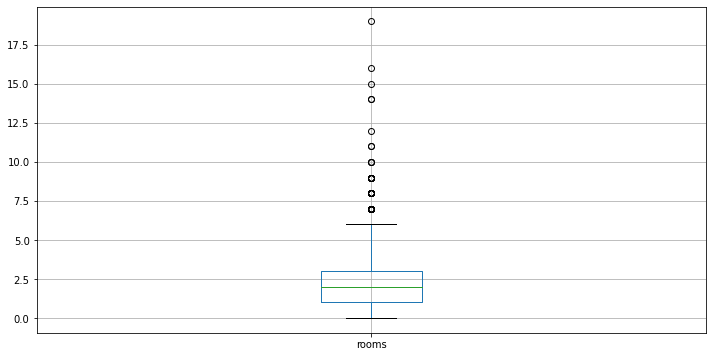

In [63]:
# (3) построим диаграмму размаха

data.boxplot(column=['rooms'], figsize=(12,6), grid=True)

<u>**Промежуточный вывод:**</u> для анализа следуют отобрать значения **от 1 до 6 включительно** (согласно гистограмме эти значения встречаются чаще всего, и они находятся в пределах "ящика с усами", т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR).

In [64]:
# (4) сделаем срез данных, сохраним результат в переменной df и выведем обновлённую описательную статистику

df = data.query('rooms >= 1 & rooms <= 6').reset_index(drop=True)
df['rooms'].describe()

count   23,281.00
mean         2.06
std          0.99
min          1.00
25%          1.00
50%          2.00
75%          3.00
max          6.00
Name: rooms, dtype: float64

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

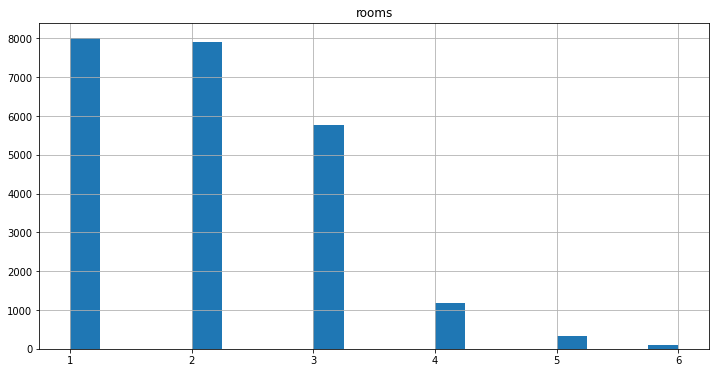

In [65]:
# (5) построим новую гистограмму

df.hist('rooms', bins=20, figsize=(12,6))

<AxesSubplot:>

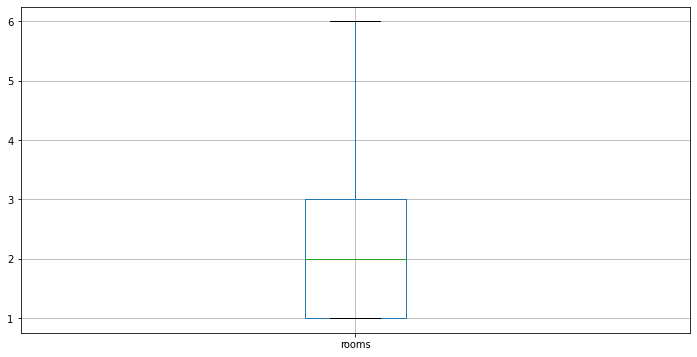

In [66]:
# (6) построим новую диаграмму размаха

df.boxplot(column=['rooms'], figsize=(12,6), grid=True)

<u>**Вывод:**</u> теперь все значения находятся в пределах "ящика с усами" (т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR) и ни одно из них не является аномальным => данные из столбца можно использовать для анализа.

---
**Высота потолков (`ceiling_height`)** <a id="ceiling_height"></a>

In [67]:
# (1) выведем данные описательной статистики

print('Описательная статистика:')
data['ceiling_height'].describe()

Описательная статистика:


count   23,565.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

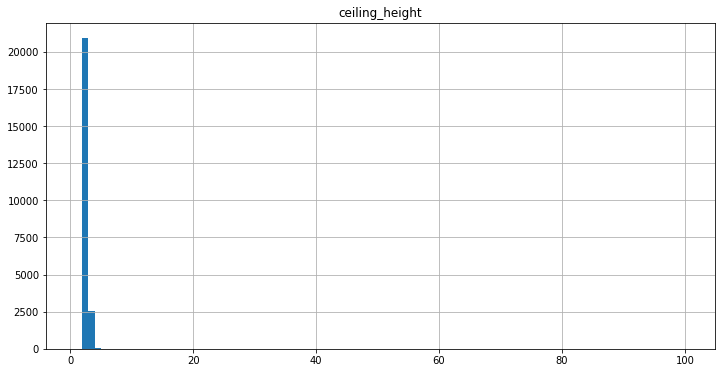

In [68]:
# (2) построим гистограмму

data.hist('ceiling_height', bins=100, figsize=(12,6))

Дальнейший анализ нельзя проводить, так как **значения параметра противоречат логике**. Высота потолков в квартире не может быть равна 20, 30 и тем более 100 метрам. Необходимо детально изучить данные столбца и произвести необходимые манипуляции, после которых можно будет заново построить гистограмму и диаграмму размаха.

In [69]:
# (3) выведем уникальные значения столбца 'ceiling_height'

data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

Можно заметить, что несколько двухзначных значений, cкорее всего, появились из-за допущенной ошибки при вводе данных. Например, высота потолков **32 кв.м.** на самом деле **3.2 кв.м.**, а **27 кв.м.** на самом деле **2.7 кв.м.** **Изменим все значения > 10**, чтобы они соответствовали логике. В случае с такими значениями, как **100** или **14** подход не работает, т.к. перемещение точки не делает данные адекватными => при дальнейшем анализе преобразованные значения будут отброшены.

In [70]:
# (4) изменим значения

data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = \
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] / 10

# (5) проверим результат

data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

Теперь данные можно использовать для анализа, повтори предыдущие шаги.

In [71]:
# (6) выведем данные описательной статистики

print('Описательная статистика:')
data['ceiling_height'].describe()

Описательная статистика:


count   23,565.00
mean         2.70
std          0.24
min          1.00
25%          2.60
50%          2.65
75%          2.70
max         10.00
Name: ceiling_height, dtype: float64

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

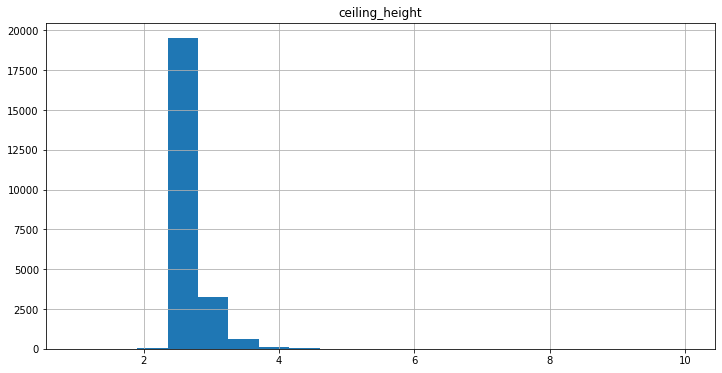

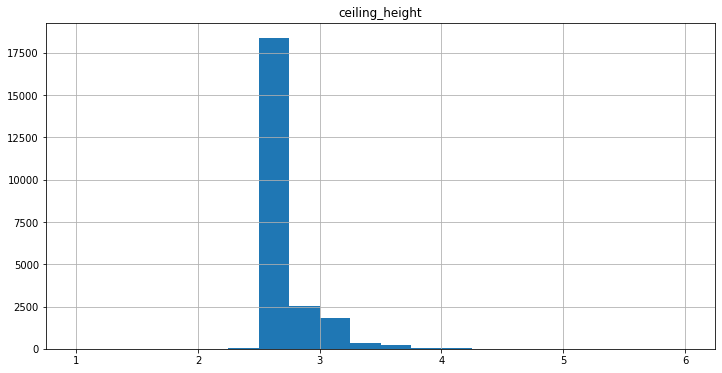

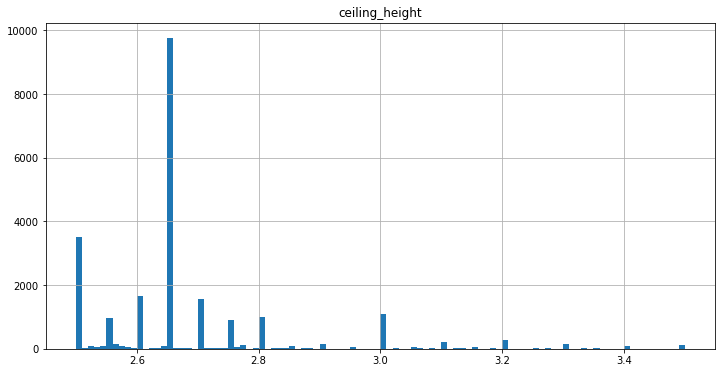

In [72]:
# (7.1) построим гистограмму

data.hist('ceiling_height', bins=20, figsize=(12,6))

# (7.2) изменим параметры гистограммы для более качественной визуализации

data.hist('ceiling_height', bins=20, figsize=(12,6), range=(1,6))

# (7.3) изменим параметры гистограммы для более качественной визуализации

data.hist('ceiling_height', bins=100, figsize=(12,6), range=(2.5,3.5))

(2.0, 3.0)

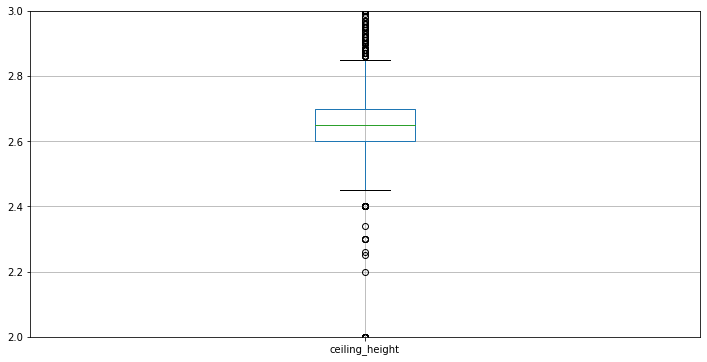

In [73]:
# (8) построим диаграмму размаха

data.boxplot(column=['ceiling_height'], figsize=(12,6), grid=True)
plt.ylim(2, 3)

In [74]:
# (9) рассчитаем верхнюю и нижнюю границу 1,5 межквартильного размаха

q_lower = data['ceiling_height'].quantile(0.25)
q_upper = data['ceiling_height'].quantile(0.75)

iqr = round(q_upper - q_lower, 2)

print('Верхняя граница 1.5 межквартильного размаха:', q_upper + 1.5 * iqr)

Верхняя граница 1.5 межквартильного размаха: 2.85


<u>**Промежуточный вывод:**</u> для анализа следуют отобрать значения **от 2.5 до 3 включительно** (согласно гистограмме эти значения встречаются чаще всего). Да, верхняя граница 1.5 межквартильного размаха равняется 2.85, но на гисторграмме видно, что примерно 1000 квартир имеют высоту потолков 3 метра (не похоже на аномалию или выброс, квартиры с такими потолками могут быть в старых домах или в новых ЖК премиум класса). Данное решение принято по причине того, что параметр 2 раза подвергался обработке: заполнению пустых ячеек медианным значением и устранению ошибок из-за неправильного ввода данных (двухзначные и трёхзначные значения). 

In [75]:
# (10) сделаем срез данных, сохраним результат в переменной df и выведем обновлённую описательную статистику

df = data.query('ceiling_height >= 2.5 & ceiling_height <= 3').reset_index(drop=True)
df['ceiling_height'].describe()

count   21,984.00
mean         2.65
std          0.12
min          2.50
25%          2.60
50%          2.65
75%          2.65
max          3.00
Name: ceiling_height, dtype: float64

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

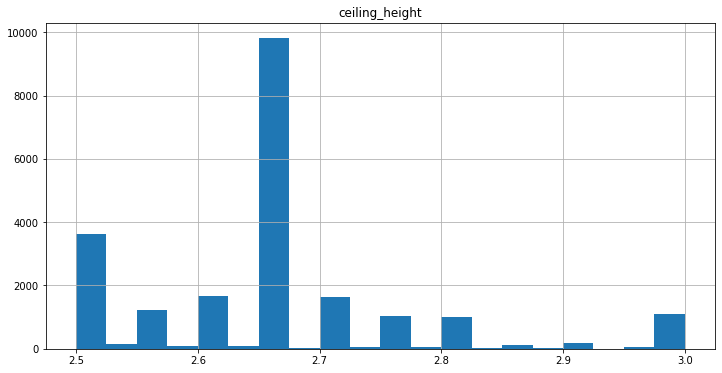

In [76]:
# (11) построим новую гистограмму

df.hist('ceiling_height', bins=20, figsize=(12,6))

<u>**Вывод:**</u> данные из столбца можно использовать для анализа.

---
**Этаж квартиры (`floor`)** <a id="floor"></a>

In [77]:
# (1) выведем данные описательной статистики

print('Описательная статистика:')
data['floor'].describe()

Описательная статистика:


count   23,565.00
mean         5.88
std          4.87
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor, dtype: float64

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

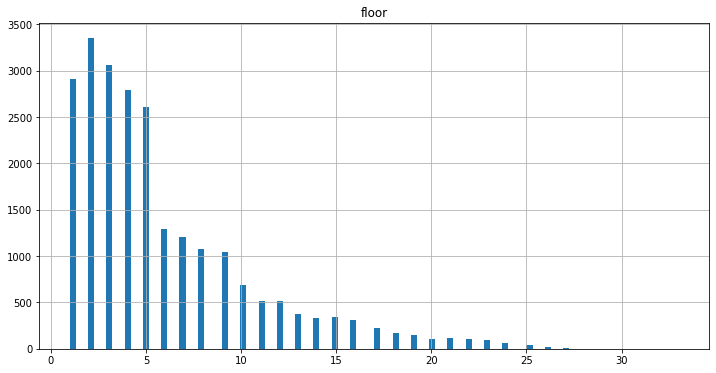

In [78]:
# (2) построим гистограмму

data.hist('floor', bins=100, figsize=(12,6))

<AxesSubplot:>

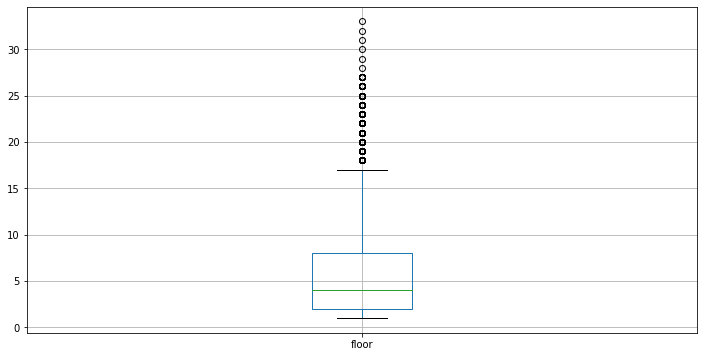

In [79]:
# (3) построим диаграмму размаха

data.boxplot(column=['floor'], figsize=(12,6), grid=True)

<u>**Промежуточный вывод:**</u> для анализа следуют отобрать значения **от 1 до 14 включительно** (согласно гистограмме эти значения встречаются чаще всего, и они находятся в пределах "ящика с усами", т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR).

In [80]:
# (4) сделаем срез данных, сохраним результат в переменной df и выведем обновлённую описательную статистику

df = data.query('floor >= 1 & floor <= 14').reset_index(drop=True)
df['floor'].describe()

count   21,782.00
mean         4.85
std          3.29
min          1.00
25%          2.00
50%          4.00
75%          7.00
max         14.00
Name: floor, dtype: float64

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

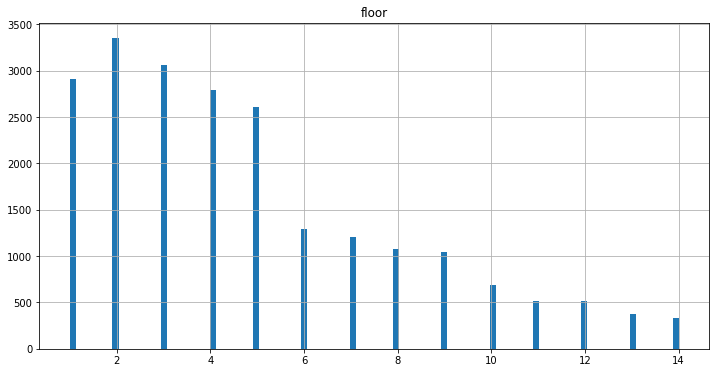

In [81]:
# (5) построим новую гистограмму

df.hist('floor', bins=100, figsize=(12,6))

<AxesSubplot:>

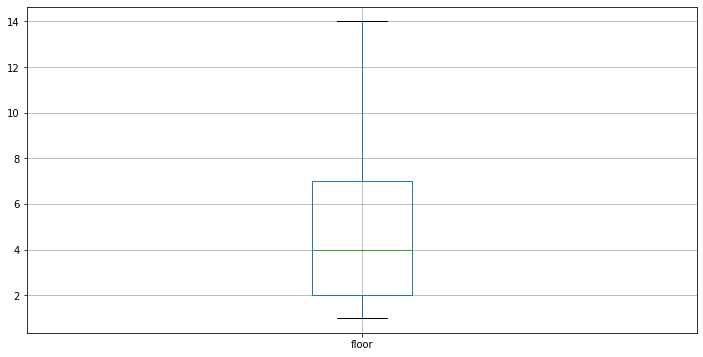

In [82]:
# (6) построим новую диаграмму размаха

df.boxplot(column=['floor'], figsize=(12,6), grid=True)

<u>**Вывод:**</u> теперь все значения находятся в пределах "ящика с усами" (т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR) и ни одно из них не является аномальным => данные из столбца можно использовать для анализа.

---
**Тип этажа квартиры (`floor_type`)** <a id="floor_type"></a>

Распределение объектов недвижимости в зависимоcти от этажа (**до преобразований**):

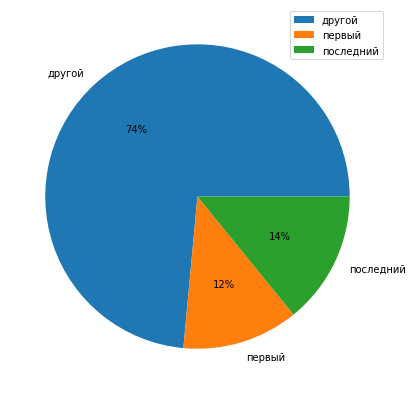

In [83]:
(data
    .pivot_table(index='floor_type',values='last_price',aggfunc='count')
    .plot.pie(y='last_price', 
              figsize=(10,7), 
              label='',
              autopct='%1.0f%%')
)

plt.show()

Распределение объектов недвижимости в зависимоcти от этажа (**после преобразований**):

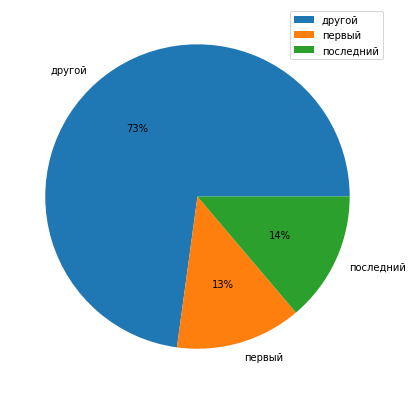

In [84]:
(df
    .pivot_table(index='floor_type',values='last_price',aggfunc='count')
    .plot.pie(y='last_price', 
              figsize=(10,7), 
              label='',
              autopct='%1.0f%%')
)

plt.show()

<u>**Вывод:**</u> подавляющее число квартир находится на любом другом этаже, кроме первого и последнего. **Далее в анализе будет проанализировано влияние типа этажа на общую (полную) стоимость квартиры**.

---
**Общее количество этажей в доме (`floors_total`)** <a id="floors_total"></a>

In [85]:
# (1) выведем данные описательной статистики

print('Описательная статистика:')
data['floors_total'].describe()

Описательная статистика:


count   23,565.00
mean        10.68
std          6.59
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

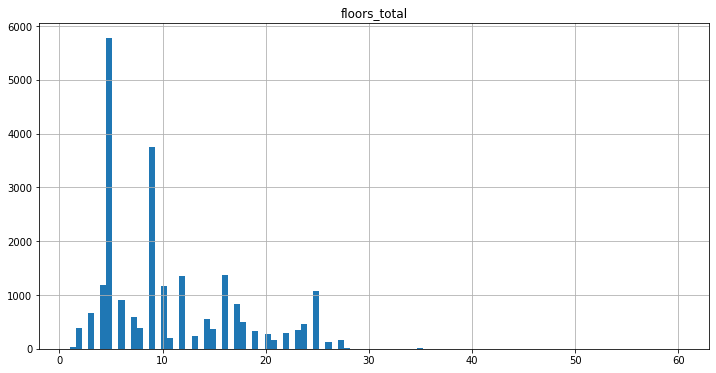

In [86]:
# (2) построим гистограмму

data.hist('floors_total', bins=100, figsize=(12,6))

<AxesSubplot:>

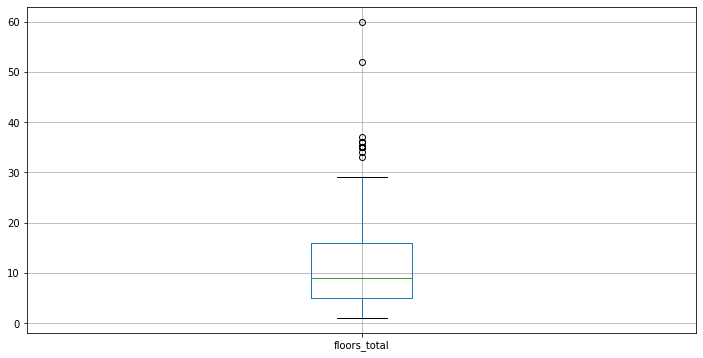

In [87]:
# (3) построим диаграмму размаха

data.boxplot(column=['floors_total'], figsize=(12,6), grid=True)

<u>**Промежуточный вывод:**</u> для анализа следуют отобрать значения **от 3 до 25 включительно** (согласно гистограмме эти значения встречаются чаще всего, и они находятся в пределах "ящика с усами", т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR).

In [88]:
# (4) сделаем срез данных, сохраним результат в переменной df и выведем обновлённую описательную статистику

df = data.query('floors_total >= 3 & floors_total <= 25').reset_index(drop=True)
df['floors_total'].describe()

count   22,817.00
mean        10.58
std          6.25
min          3.00
25%          5.00
50%          9.00
75%         15.00
max         25.00
Name: floors_total, dtype: float64

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

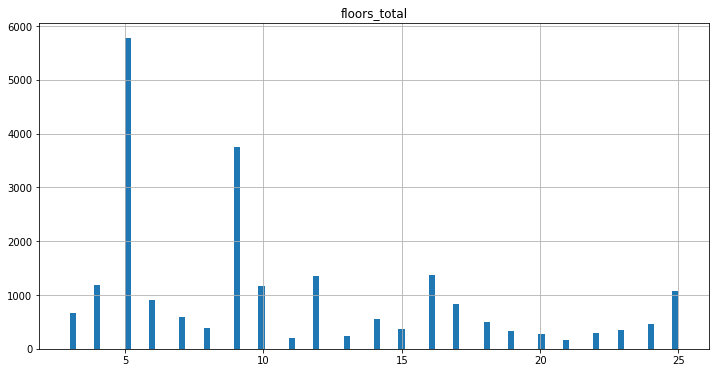

In [89]:
# (5) построим новую гистограмму

df.hist('floors_total', bins=100, figsize=(12,6))

<AxesSubplot:>

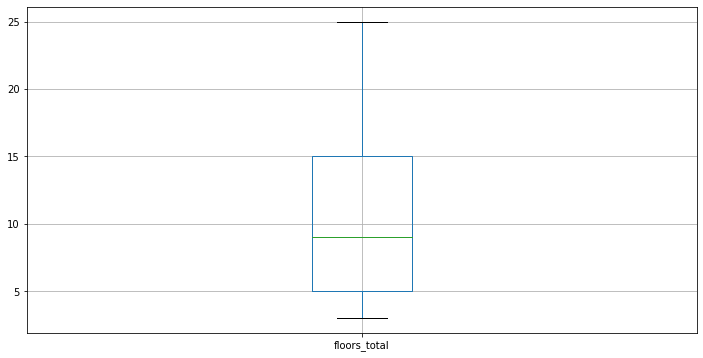

In [90]:
# (6) построим новую диаграмму размаха

df.boxplot(column=['floors_total'], figsize=(12,6), grid=True)

<u>**Вывод:**</u> теперь все значения находятся в пределах "ящика с усами" (т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR) и ни одно из них не является аномальным => данные из столбца можно использовать для анализа.

---
**Расстояние до центра города в метрах (`city_centers_nearest`)** <a id="city_centers_nearest"></a>

Проанализируем показатель `city_centers_nearest` из картографических данных.

In [91]:
# (1) выведем данные описательной статистики

print('Описательная статистика:')
data['city_centers_nearest'].describe()

Описательная статистика:


count   18,064.00
mean    14,192.66
std      8,613.35
min        181.00
25%      9,238.00
50%     13,096.50
75%     16,285.00
max     65,968.00
Name: city_centers_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

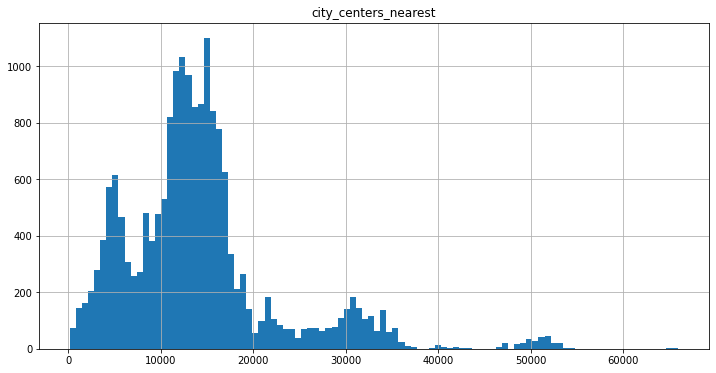

In [92]:
# (2) построим гистограмму

data.hist('city_centers_nearest', bins=100, figsize=(12,6))

(0.0, 30000.0)

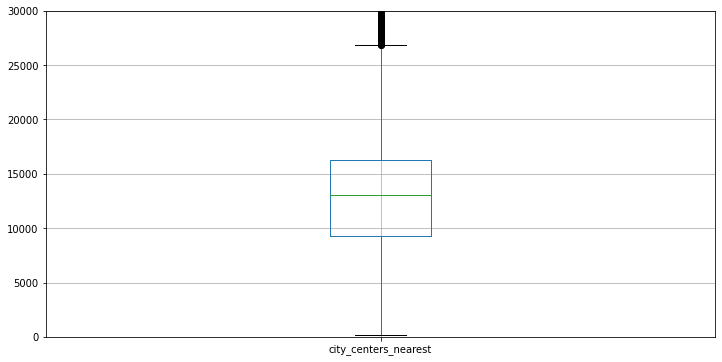

In [93]:
# (3) построим диаграмму размаха

data.boxplot(column=['city_centers_nearest'], figsize=(12,6), grid=True)
plt.ylim(0, 30000)

<u>**Промежуточный вывод:**</u> для анализа следуют отобрать значения **от 500 до 25 000** (согласно гистограмме эти значения встречаются чаще всего, и они находятся в пределах "ящика с усами", т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR).

In [94]:
# (4) сделаем срез данных, сохраним результат в переменной df и выведем обновлённую описательную статистику

df = data.query('city_centers_nearest > 500 & city_centers_nearest < 25000 or city_centers_nearest.isna()').reset_index(drop=True)
df['city_centers_nearest'].describe()

count   16,121.00
mean    11,877.06
std      4,939.31
min        515.00
25%      8,460.00
50%     12,419.00
75%     15,199.00
max     24,972.00
Name: city_centers_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

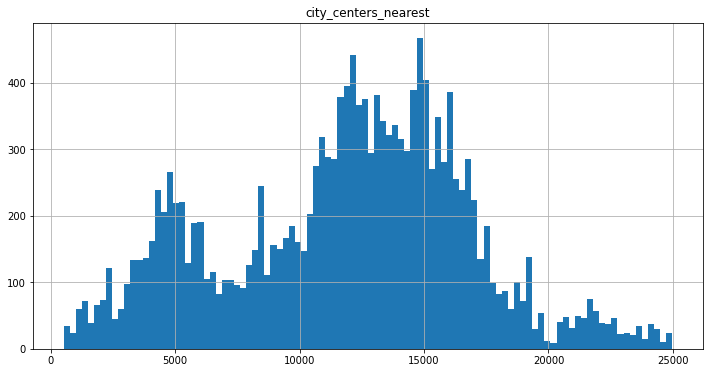

In [95]:
# (5) построим новую гистограмму

df.hist('city_centers_nearest', bins=100, figsize=(12,6))

<AxesSubplot:>

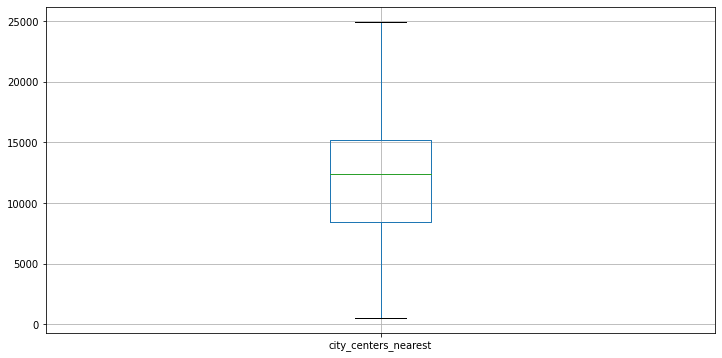

In [96]:
# (6) построим новую диаграмму размаха

df.boxplot(column=['city_centers_nearest'], figsize=(12,6), grid=True)

<u>**Вывод:**</u> теперь все значения находятся в пределах "ящика с усами" (т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR) и ни одно из них не является аномальным => данные из столбца можно использовать для анализа.

---
**Расстояние до ближайшего аэропорта (`airports_nearest`)** <a id="airports_nearest"></a>

In [97]:
# (1) выведем данные описательной статистики

print('Описательная статистика:')
data['airports_nearest'].describe()

Описательная статистика:


count   18,041.00
mean    28,797.08
std     12,632.50
min          0.00
25%     18,565.00
50%     26,757.00
75%     37,273.00
max     84,869.00
Name: airports_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

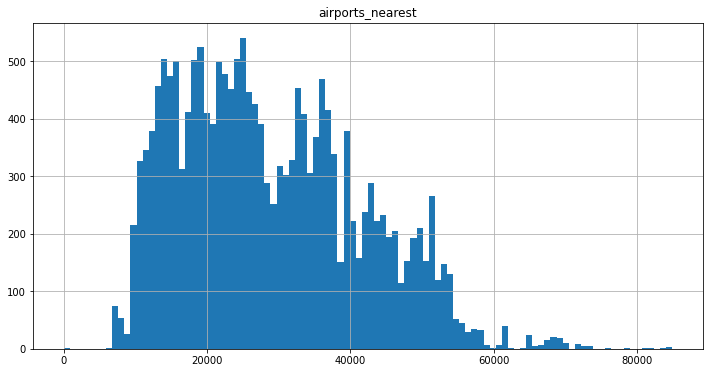

In [98]:
# (2) построим гистограмму

data.hist('airports_nearest', bins=100, figsize=(12,6))

<AxesSubplot:>

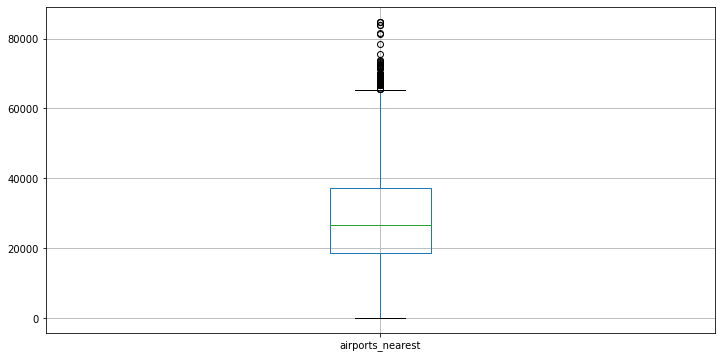

In [99]:
# (3) построим диаграмму размаха

data.boxplot(column=['airports_nearest'], figsize=(12,6), grid=True)

<u>**Промежуточный вывод:**</u> для анализа следуют отобрать значения **от 9 000 до 60 000** (согласно гистограмме эти значения встречаются чаще всего, и они находятся в пределах "ящика с усами", т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR).

In [100]:
# (4) сделаем срез данных, сохраним результат в переменной df и выведем обновлённую описательную статистику

df = data.query('airports_nearest > 9000 & airports_nearest < 60000 or airports_nearest.isna()').reset_index(drop=True)
df['airports_nearest'].describe()

count   17,736.00
mean    28,585.88
std     12,014.42
min      9,112.00
25%     18,652.75
50%     26,716.00
75%     36,922.25
max     59,705.00
Name: airports_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

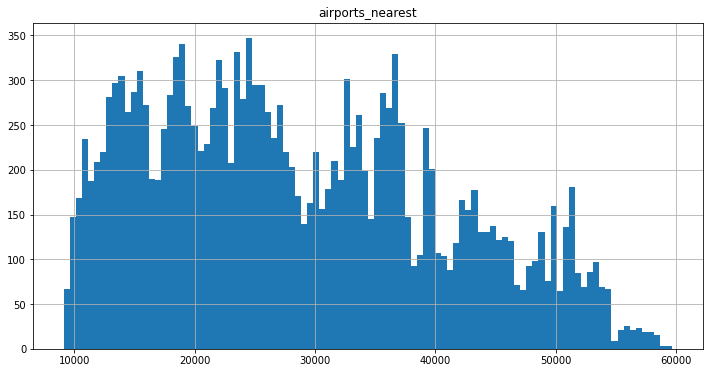

In [101]:
# (5) построим новую гистограмму

df.hist('airports_nearest', bins=100, figsize=(12,6))

<AxesSubplot:>

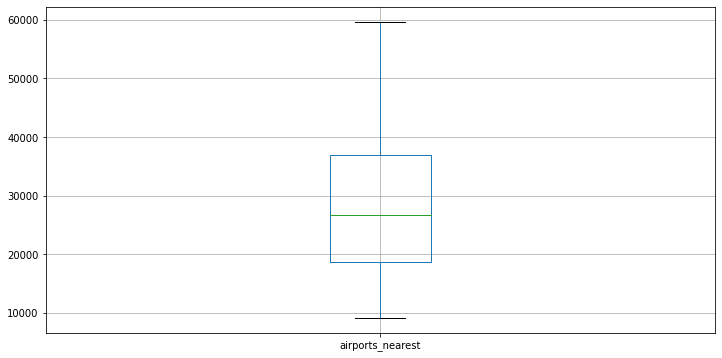

In [102]:
# (6) построим новую диаграмму размаха

df.boxplot(column=['airports_nearest'], figsize=(12,6), grid=True)

<u>**Вывод:**</u> теперь все значения находятся в пределах "ящика с усами" (т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR) и ни одно из них не является аномальным => данные из столбца можно использовать для анализа.

---
**Расстояние до ближайшего парка (`parks_nearest`)** <a id="parks_nearest"></a>

In [103]:
# (1) выведем данные описательной статистики

print('Описательная статистика:')
data['parks_nearest'].describe()

Описательная статистика:


count   8,030.00
mean      490.58
std       341.57
min         1.00
25%       288.00
50%       455.00
75%       612.00
max     3,190.00
Name: parks_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

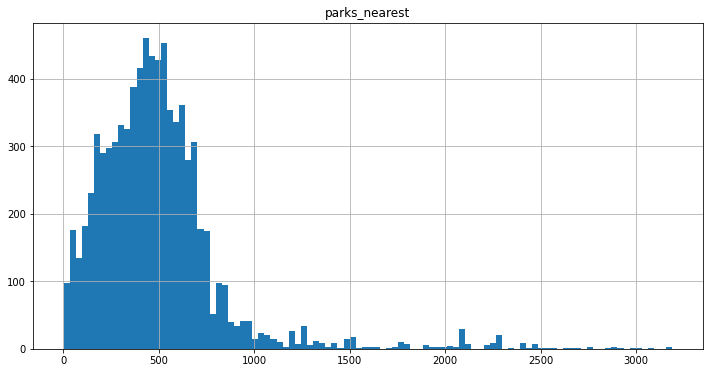

In [104]:
# (2) построим гистограмму

data.hist('parks_nearest', bins=100, figsize=(12,6))

<AxesSubplot:>

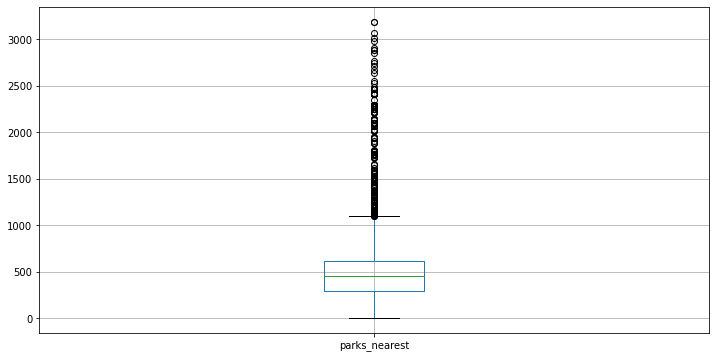

In [105]:
# (3) построим диаграмму размаха

data.boxplot(column=['parks_nearest'], figsize=(12,6), grid=True)

<u>**Промежуточный вывод:**</u> для анализа следуют отобрать значения **от 1 до 1 000** (согласно гистограмме эти значения встречаются чаще всего, и они находятся в пределах "ящика с усами", т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR).

In [106]:
# (4) сделаем срез данных, сохраним результат в переменной df и выведем обновлённую описательную статистику

df = data.query('parks_nearest > 1 & parks_nearest < 1000 or parks_nearest.isna()').reset_index(drop=True)
df['parks_nearest'].describe()

count   7,655.00
mean      435.56
std       209.47
min         3.00
25%       280.00
50%       441.00
75%       587.00
max       997.00
Name: parks_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

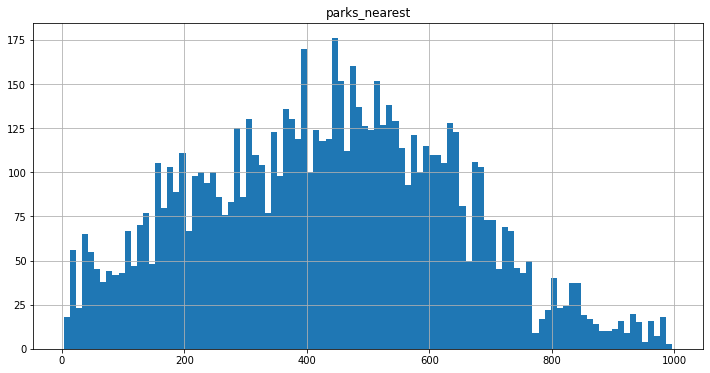

In [107]:
# (5) построим новую гистограмму

df.hist('parks_nearest', bins=100, figsize=(12,6))

<AxesSubplot:>

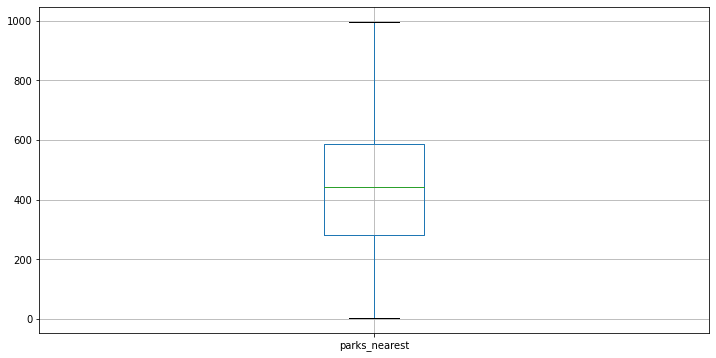

In [108]:
# (6) построим новую диаграмму размаха

df.boxplot(column=['parks_nearest'], figsize=(12,6), grid=True)

<u>**Вывод:**</u> теперь все значения находятся в пределах "ящика с усами" (т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR) и ни одно из них не является аномальным => данные из столбца можно использовать для анализа.

---
**День, месяц и год публикации объявления (`day_publication`, `month_publication` и `year_publication`).** <a id="publication"></a>

array([[<AxesSubplot:title={'center':'year_publication'}>]], dtype=object)

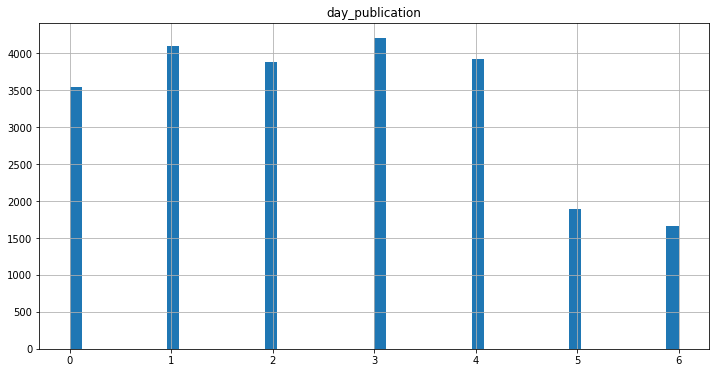

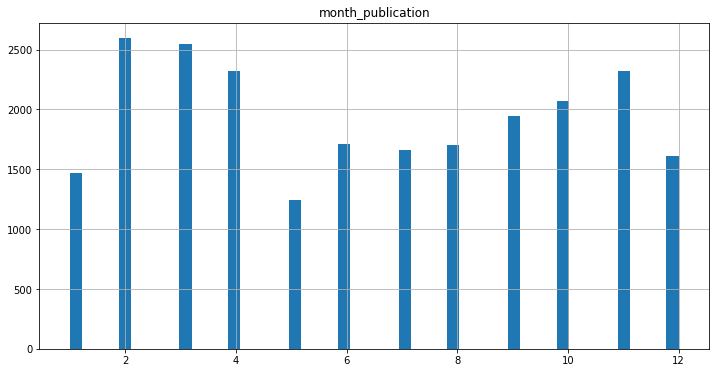

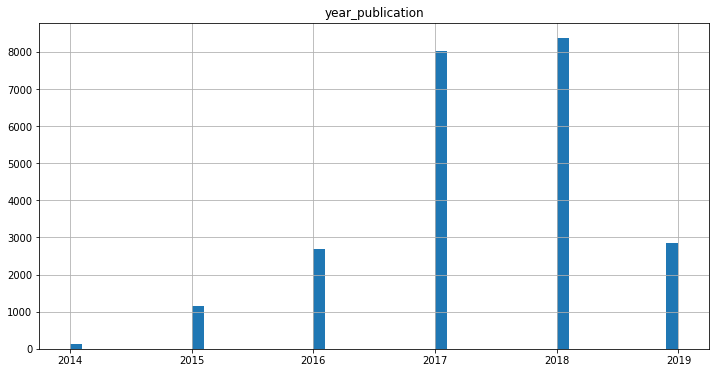

In [109]:
df.hist('day_publication', bins=50, figsize=(12,6))
df.hist('month_publication', bins=50, figsize=(12,6))
df.hist('year_publication', bins=50, figsize=(12,6))

<u>**Вывод:**</u> чаще всего квартиры выставляются на продажу **с февраля по апрель** и **с сентября по ноябрь**. Как правило, объявления размещаются **в будние дни** (самое большое количество объявлений было размещено во вторник и четверг). Большое количество квартир продавалось **в 2017 и 2018 гг.**

<u>**ПРОВЕРКА ДАТАСЕТА ПОСЛЕ ФИЛЬТРАЦИИ**</u>

In [110]:
# Код ревьюера
df = (
    data
    .query('total_area > 10 & total_area < 170') 
    .query('living_area > 5 & living_area < 160') 
    .query('kitchen_area > 2 & kitchen_area < 17 or kitchen_area.isna()')
    .query('last_price > 430_000 & last_price < 20e6')
    .query('rooms >= 1 & rooms <= 6')
    .query('ceiling_height >= 2.5 & ceiling_height <= 4')
    .query('floor >= 1 & floor <= 20')
    .query('floors_total >= 3 & floors_total <= 25')
    .reset_index(drop=True)
)

df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_publication,month_publication,year_publication,floor_type,distance_city_center_km
0,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79",1,12,2018,первый,19.00
1,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,санкт-петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",3,8,2015,другой,14.00
2,10,"2,890,000.00",30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,посёлок городского типа янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,"95,065.79",0,9,2018,другой,NaN
3,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,санкт-петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00,"88,524.59",6,2,2017,другой,15.00
4,5,"5,050,000.00",39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,санкт-петербург,"38,357.00","13,878.00",1.00,310.00,2.00,553.00,137.00,"127,525.25",3,11,2017,другой,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20157,9,"4,600,000.00",62.40,2016-08-05,3,2.60,9,40.00,8,False,False,False,8.00,0,петергоф,"45,602.00","34,104.00",1.00,352.00,1.00,675.00,239.00,"73,717.95",4,8,2016,другой,34.00
20158,9,"9,700,000.00",133.81,2017-03-21,3,3.70,5,73.30,3,False,False,False,13.83,0,санкт-петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,NaN,"72,490.85",1,3,2017,другой,4.00
20159,14,"3,100,000.00",59.00,2018-01-15,3,2.65,5,38.00,4,False,False,False,8.50,0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00,"52,542.37",0,1,2018,другой,NaN
20160,18,"2,500,000.00",56.70,2018-02-11,2,2.65,3,29.70,1,False,False,False,8.80,0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"44,091.71",6,2,2018,первый,NaN


In [111]:
# Код ревьюера
df.shape[0] / rz

0.8507531963373982

### Время продажи квартиры

<u>**Вопрос заказчика**</u>: Сколько времени обычно занимает продажа квартиры? Какие продажи можно считать быстрыми, а какие — необычно долгими?

Проведём исследовательский анализ данных: рассмотрим параметр `days_exposition` (сколько дней было размещено объявление (от публикации до снятия)).

In [112]:
# (1) выведем данные описательной статистики

print('Описательная статистика:')
data['days_exposition'].describe()

Описательная статистика:


count   20,394.00
mean       180.74
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

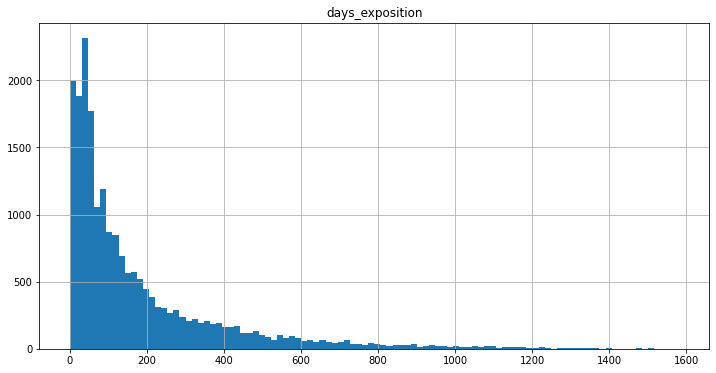

In [113]:
# (2) построим гистограмму

data.hist('days_exposition', bins=100, figsize=(12,6))

<AxesSubplot:>

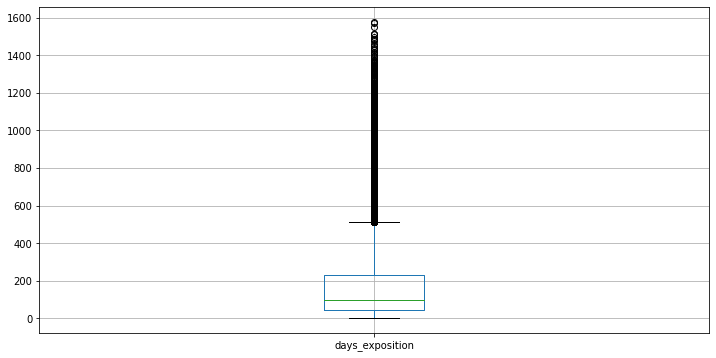

In [114]:
# (3) построим диаграмму размаха

data.boxplot(column=['days_exposition'], figsize=(12,6), grid=True)

<u>**Промежуточный вывод:**</u> высокий показатель нулевого значения объясняется тем, что ранее пропуски были заполнены нулями (0), все нулевые значения необходимо устранить. Для анализа следуют отобрать значения **от 1 до 250 включительно** (согласно гистограмме эти значения встречаются чаще всего, и они находятся в пределах "ящика с усами", т.е. в пределах 1,5 межквартильного размаха - 1,5 IQR). 

In [115]:
# (4) сделаем срез данных, сохраним результат в переменной df и выведем обновлённую описательную статистику

df = data.query('days_exposition >= 1 & days_exposition <= 250').reset_index(drop=True)
df['days_exposition'].describe()

count   15,673.00
mean        83.31
std         63.70
min          1.00
25%         33.00
50%         63.00
75%        123.00
max        250.00
Name: days_exposition, dtype: float64

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

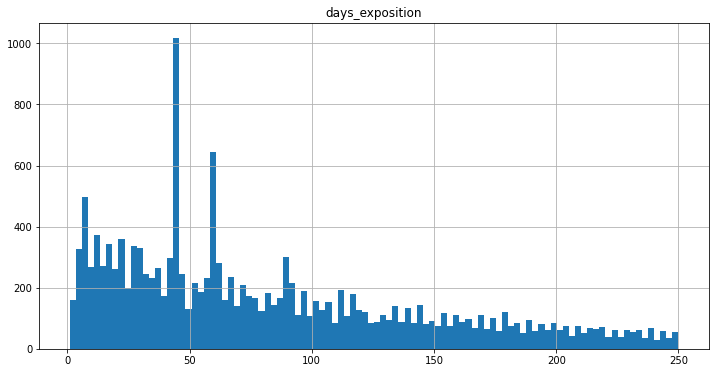

In [116]:
# (5) построим новую гистограмму

df.hist('days_exposition', bins=100, figsize=(12,6))

<AxesSubplot:>

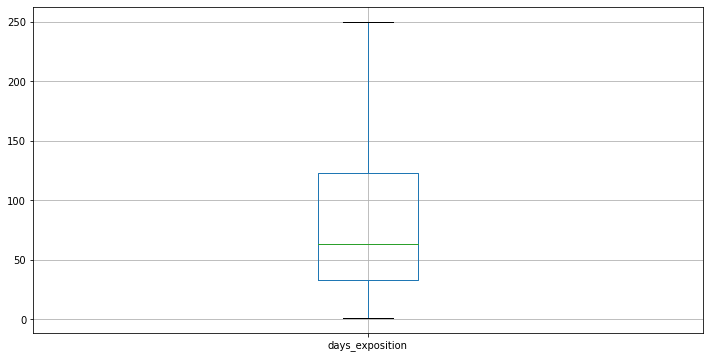

In [117]:
# (6) построим новую диаграмму размаха

df.boxplot(column=['days_exposition'], figsize=(12,6), grid=True)

In [118]:
# (7) дополнительные подсчёты

print('Доля квартир, продающихся более 250 дней:', \
(data[data['days_exposition'] > 250]['days_exposition'].count()) / (data['days_exposition'].shape[0]))

Доля квартир, продающихся более 250 дней: 0.20033948652662847


<u>**Вывод:**</u> **в среднем продажа квартиры занимает 2-3 месяца**, если исходить из полученных значений среднего арифметического и медианы. Скорость продажи зависит не только от рассмотренных ранее параметров (площадь, этаж, удалённость от центра и т.д.), но ещё и от состояния квартиры, инфраструктуры, транспортной доступности и пр. **Быстрыми** можно считать продажи, которые были осуществлены **в течение 2 месяцев** с момента публикации объявления, а **долгими** - те, которые находятся за пределами 3 квартиля (Q3) т. е. **более 4-5 месяцев**, а **необычно долгими** - те, которые находятся за границами 1,5 межквартильного размаха (1,5 * IQR) т. е. **более 8-9 месяцев** (на их долю приходится примерно 20% от всей выборки).

### Факторы, влияющие на общую (полную) стоимость объекта

<u>**Вопрос заказчика**</u>: Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Проанализируем зависимость цены квартиры (`last_price`) от следующих параметров:

 - [общей площади (`total_area`)](#analysis1);
 - [жилой площади (`living_area`)](#analysis2);
 - [площади кухни (`kitchen_area`)](#analysis3);
 - [количества комнат (`rooms`)](#analysis4);
 - [типа этажа, на котором расположена квартира (первый, последний, другой) (`floor_type`)](#analysis5);
 - [даты размещения (день недели, месяц, год) (`day_publication`, `month_publication`, `year_publication`)](#analysis678);

Повторим срез данных для параметров (анализ параметров был произведён ранее, см. ["Изучение основных параметров и устранение выбросов"](#parameters))

In [119]:
# (1) сохраним предобработанный датафрейм в переменной df_factors_price

df_factors_price = data

# (2) повторим срез данных для параметров 'last_price', 'total_area', 'living_area', 'kitchen_area' и 'rooms'

df_factors_price = df_factors_price.query('last_price > 430_000 & last_price < 11_875_000')
df_factors_price = df_factors_price.query('total_area > 10 & total_area < 114')
df_factors_price = df_factors_price.query('living_area > 5 & living_area < 75')
df_factors_price = df_factors_price.query('kitchen_area > 2 & kitchen_area < 17')
df_factors_price = df_factors_price.query('rooms >= 1 & rooms <= 6')


# (3) выведем значения обновлённого датафрейма, который используем для анализа

df_factors_price.reset_index(drop=True).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_publication,month_publication,year_publication,floor_type,distance_city_center_km
0,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79",1,12,2018,первый,19.00
1,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,санкт-петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",3,8,2015,другой,14.00
2,10,"2,890,000.00",30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,посёлок городского типа янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,"95,065.79",0,9,2018,другой,NaN
3,6,"3,700,000.00",37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,посёлок парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00,"99,195.71",3,11,2017,другой,19.00
4,20,"2,900,000.00",33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00,"87,454.76",2,5,2018,другой,NaN


**Анализ 1.** Проанализируем зависимость цены квартиры (`last_price`) от общей площади (`total_area`) <a id="analysis1"></a>

Коэффициент корреляции: 0.6815402400327228



<AxesSubplot:xlabel='last_price', ylabel='total_area'>

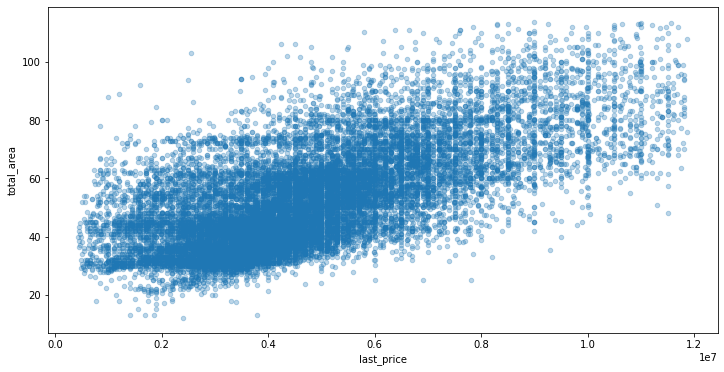

In [120]:
# Для установления связи между параметрами найдём коэффициент корреляции и построим диаграмму рассеяния
 
print('Коэффициент корреляции:', df_factors_price['last_price'].corr(df_factors_price['total_area']))

print()

df_factors_price.plot(kind='scatter', x='last_price', y='total_area', alpha=0.3, figsize=(12,6))

<u>**Вывод:**</u> между параметрами прослеживается прямая связь, которую можно назвать **выше средней**. Общая площадь квартиры является значимым фактором, влияющим на общую (полную) стоимость объекта, но этот фактор не является ключевым.

---
**Анализ 2.** Проанализируем зависимость цены квартиры (`last_price`) от жилой площади (`living_area`) <a id="analysis2"></a>

Коэффициент корреляции: 0.5468032553595881



<AxesSubplot:xlabel='last_price', ylabel='living_area'>

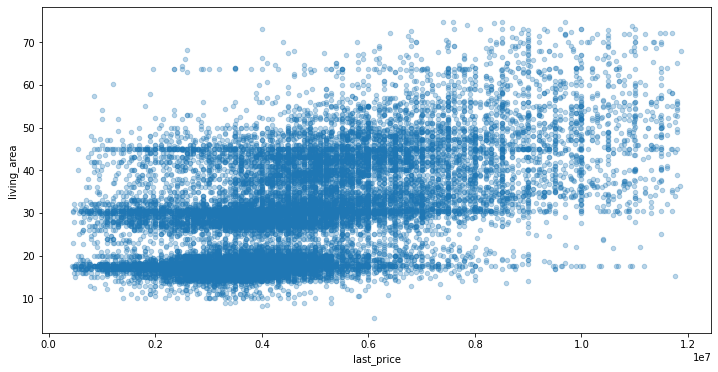

In [121]:
# Для установления связи между параметрами найдём коэффициент корреляции и построим диаграмму рассеяния
 
print('Коэффициент корреляции:', df_factors_price['last_price'].corr(df_factors_price['living_area']))

print()

df_factors_price.plot(kind='scatter', x='last_price', y='living_area', alpha=0.3, figsize=(12,6))

<u>**Вывод:**</u> между параметрами прослеживается **средняя** прямая связь. Безусловно, жилая площадь квартиры является одним из факторов, влияющих на общую (полную) стоимость объекта, но его влияние довольно незначительно.

---
**Анализ 3.** Проанализируем зависимость цены квартиры (`last_price`) от площади кухни (`kitchen_area`) <a id="analysis3"></a>

Коэффициент корреляции: 0.44572815850588854



<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

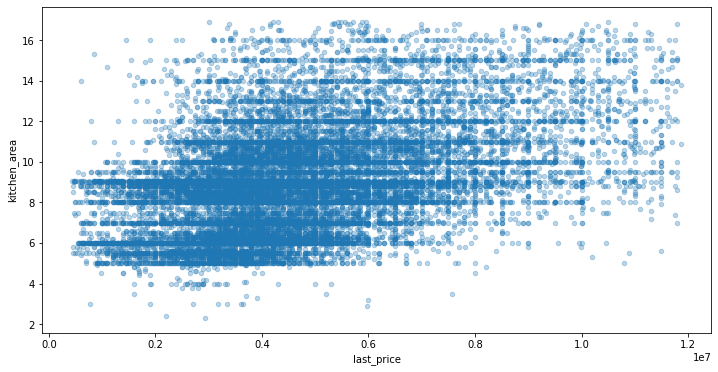

In [122]:
# Для установления связи между параметрами найдём коэффициент корреляции и построим диаграмму рассеяния
 
print('Коэффициент корреляции:', df_factors_price['last_price'].corr(df_factors_price['kitchen_area']))

print()

df_factors_price.plot(kind='scatter', x='last_price', y='kitchen_area', alpha=0.3, figsize=(12,6))

<u>**Вывод:**</u> между параметрами прослеживается **слабая** прямая связь. Площадь кухни НЕ является фактором, влияющим на общую (полную) стоимость объекта.

---
**Анализ 4.** Проанализируем зависимость цены квартиры (`last_price`) от количества комнат (`rooms`) <a id="analysis4"></a>

Коэффициент корреляции (при использовании среденего арифметического значения):
 0.8327600001475762

Коэффициент корреляции (при использовании медианного значения):
 0.8442318144650881


<AxesSubplot:xlabel='rooms'>

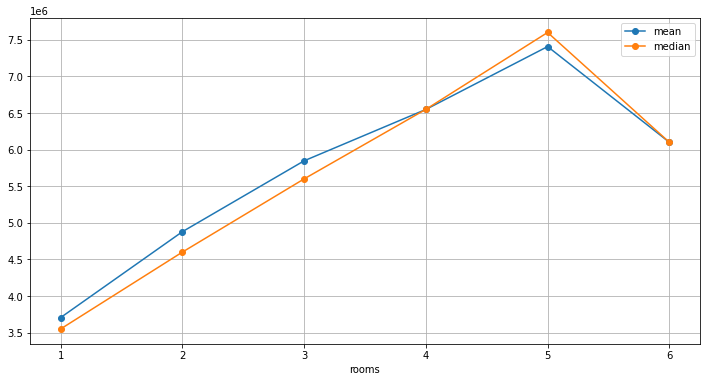

In [123]:
# Для установления связи между параметрами найдём коэффициент корреляции и построим диаграмму рассеяния 

rooms_price = df_factors_price.pivot_table(index='rooms', values='last_price', aggfunc={'mean', 'median'}).reset_index()

print('Коэффициент корреляции (при использовании среденего арифметического значения):\n', rooms_price['mean'].corr(rooms_price['rooms']))    

print('\nКоэффициент корреляции (при использовании медианного значения):\n', rooms_price['median'].corr(rooms_price['rooms']))  
    
(
    rooms_price
    .plot(style='o-',
          grid=True,
          x='rooms',
          figsize=(12,6))
)

<u>**Вывод:**</u> между параметрами прослеживается прямая связь, которую можно назвать **очень высокой**. Количество комнат является ключевым фактором, влияющим на общую (полную) стоимость объекта.

---
**Анализ 5.** Проанализируем зависимость цены квартиры (`last_price`) от типа этажа, на котором расположена квартира (`floor_type`) <a id="analysis5"></a>

<AxesSubplot:xlabel='floor_type'>

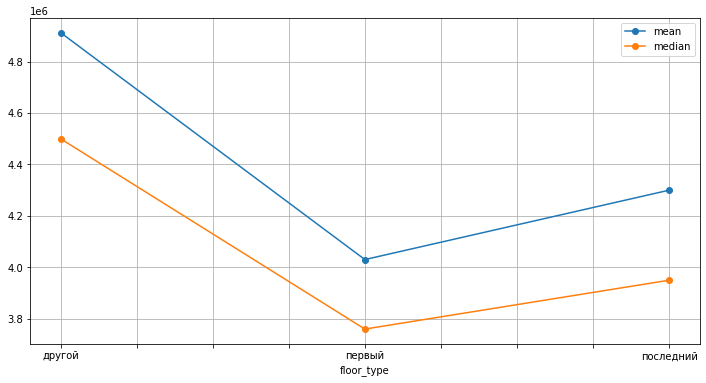

In [124]:
# Построим график для определения влияния параметра

floor_price = df_factors_price.pivot_table(index='floor_type', values='last_price', aggfunc={'mean', 'median'}).reset_index()
    
(
    floor_price
    .plot(style='o-',
          grid=True,
          x='floor_type',
          figsize=(12,6))
)

<u>**Вывод:**</u> полученный график говорит нам о том, что тип этажа является **довольно значимым** фактором для цены квартиры. Квартиры, находящиеся на первом и последнем этажах оцениваются ниже, нежели квартиры на любом другом этаже.

---
**Анализ 6.** Проанализируем зависимость цены квартиры (`last_price`) от дня недели размещения объявления (`day_publication`) <a id="analysis678"></a>

<AxesSubplot:xlabel='day_publication'>

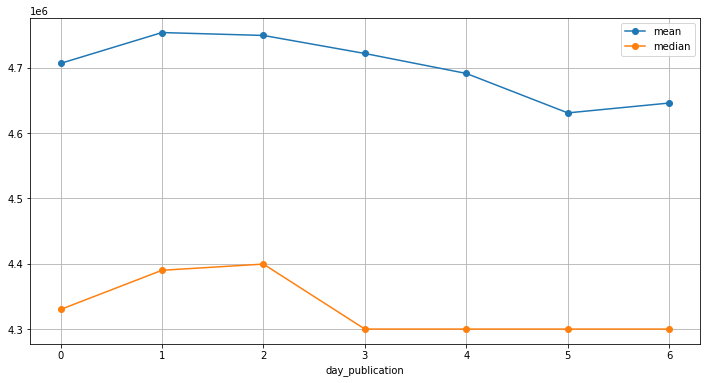

In [125]:
day_price = df_factors_price.pivot_table(index='day_publication', values='last_price', aggfunc={'mean', 'median'}).reset_index()

(
    day_price
    .plot(style='o-',
          grid=True,
          x='day_publication',
          figsize=(12,6))
)

<u>**Вывод:**</u> исходя из полученного графика, в течение недели общая (полная) стоимость объекта недвижимости меняется, но это изменение весьма незначительно. **С понедельника по четверг** цена практически не меняется (ранее было установлено, что большинство объявлений размещается **в будние дни**). **С пятницы по субботу** наблюдается незначительное снижение цены, т.е. можно предположить, что решение выставить квартиру на продажу в выходные является невыгодным.

---
**Анализ 7.** Проанализируем зависимость цены квартиры (`last_price`) от месяца размещения объявления (`month_publication`)

<AxesSubplot:xlabel='month_publication'>

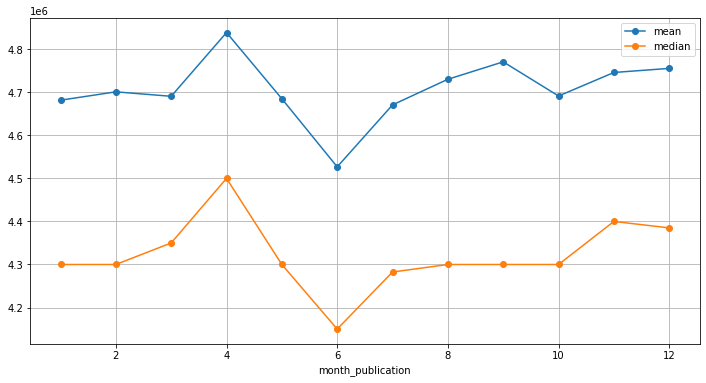

In [126]:
month_price = df_factors_price.pivot_table(index='month_publication', values='last_price', aggfunc={'mean', 'median'}).reset_index()

(
    month_price
    .plot(style='o-',
          grid=True,
          x='month_publication',
          figsize=(12,6))
)

<u>**Вывод:**</u> исходя из полученного графика, в течение года общая (полная) стоимость объекта недвижимости меняется, т.е. прослеживается зависимость от сезона. Цена квартир **в апреле** - самая высокая, а **в июне** - самая низкая. Отрезки **с мая по июль** и **с сентября по октябрь** являются самыми невыгодными для продажи.

---
**Анализ 8.** Проанализируем зависимость цены квартиры (`last_price`) от года размещения объявления (`year_publication`)

<AxesSubplot:xlabel='year_publication'>

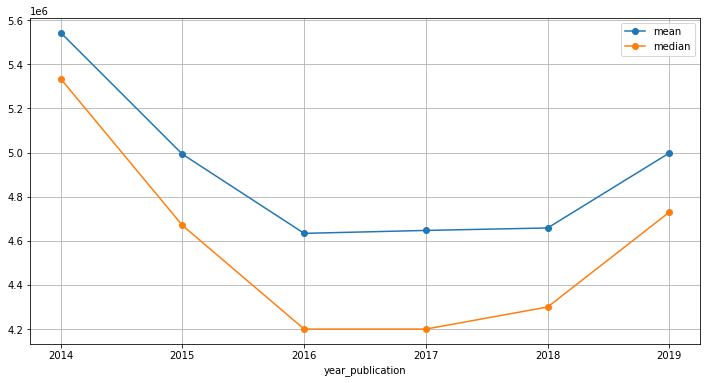

In [127]:
year_price = df_factors_price.pivot_table(index='year_publication', values='last_price', aggfunc={'mean', 'median'}).reset_index()

(
    year_price
    .plot(style='o-',
          grid=True,
          x='year_publication',
          figsize=(12,6))
)

<u>**Вывод:**</u> год размещения объявления нельзя назвать фактором влияния в классическом понимании, это параметр, который оказывает влияние при определённых событиях и обстоятельствах. На полученном графике видно в **2016-2017 гг.** наблюдалось падение цен на квартиры, это означает, что в этом промежутке времени **рынок недвижимости переживал кризис**. Кризисы, как правило, возникают по причине нестабильной экономической и политической ситуации в стране и в мире. Отсутствие спроса, демографический кризис, недоступность материалов и многие другие внешние факторы также могут повлиять на цену продажи квартиры.

**<u>РЕЗУЛЬТИРУЮЩИЙ ВЫВОД:</u>**

**Факторы, оказывающие СИЛЬНОЕ влияние на цену квартиры (`last_price`):**

* количество комнат (`rooms`);
* общая площадь (`total_area`);
* тип этажа, на котором расположена квартира (первый, последний, другой) (`floor_type`);
* месяц размещения объявления (`month_publication`);

**Факторы, оказывающие СЛАБОЕ влияние на цену квартиры (`last_price`):**

* день размещения объявления (`day_publication`);
* жилая площадь (`living_area`).

**Факторы, НЕ влияющие на цену квартиры (`last_price`):**

* площадь кухни (`kitchen_area`);

**Факторы, оказывающие влияние при определённых событиях и обстоятельствах**:

* год размещения объявления (`year_publication`).

### Cредняя цена одного квадратного метра (1 м²) в населённых пунктах с наибольшим числом объявлений

<u>**Вопрос заказчика**</u>: Какова средняя цена одного квадратного метра (1 м²) в населённых пунктах с наибольшим числом объявлений (топ-10)?

In [128]:
# (1) сохраним предобработанный датафрейм в переменной df_locality_top_ten

df_locality_top_ten = data

# (2) повторим срез данных для параметров 'last_price', 'total_area'

df_locality_top_ten = df_locality_top_ten.query('last_price > 430_000 & last_price < 11_875_000')
df_locality_top_ten = df_locality_top_ten.query('total_area > 10 & total_area < 114')


# (3) Отберём топ-10 населённых пунктов с наибольшим числом объявлений

locality_top_ten = df_locality_top_ten['locality_name'].value_counts().head(10)

# (4) Вычислим цену 1 м² и выведем результат

price_per_square_meter_top_ten = (
    df_locality_top_ten
    .query('locality_name in @locality_top_ten.index')
    .pivot_table(index='locality_name', values='price_per_square_meter')
)

price_per_square_meter_top_ten = price_per_square_meter_top_ten.sort_values(by='price_per_square_meter', ascending=False)
price_per_square_meter_top_ten

,price_per_square_meter
locality_name,
санкт-петербург,"105,707.31"
пушкин,"100,462.06"
кудрово,"95,086.98"
посёлок парголово,"90,332.26"
мурино,"86,041.12"
посёлок шушары,"78,578.07"
колпино,"75,221.88"
гатчина,"68,664.04"
всеволожск,"67,222.43"


<AxesSubplot:xlabel='locality_name'>

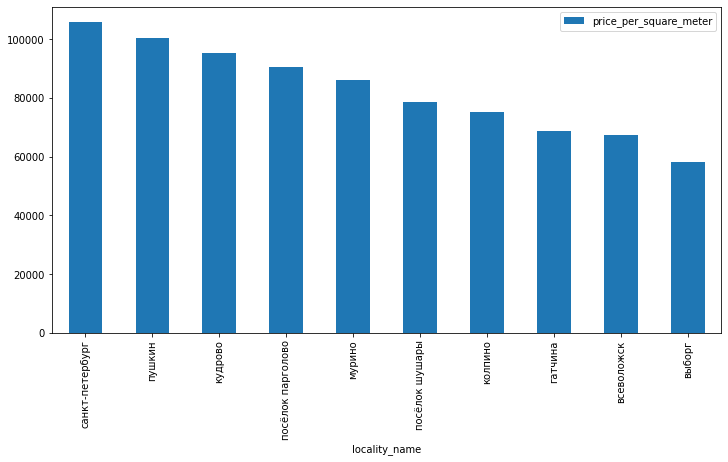

In [129]:
# (5) Построим график для лучшей интерпретации

(
    price_per_square_meter_top_ten
    .plot(kind='bar',
          figsize=(12,6))
)

**<u>ВЫВОД:</u>**

В списке топ-10 населённых пунктов помимо Санкт-Петербурга в основном представлены города и посёлки, которые де-юре являются частью города Санкт-Петербурга, либо находятся в непосредственнной близости от него. Исключение - город Выборг, данный населённый пункт находится в 100 км от Санкт-Петербурга. Результаты анализа:

**Самая высокая средняя цена 1 м²:** Санкт-Петербург (105 707 руб.)

**Самая низкая средняя цена 1 м²:** Выборг (58 192 руб.)

### Зависимость стоимости объектов от расстояния до центра города

<u>**Вопрос заказчика**</u>: Как стоимость объектов недвижимости в Санкт-Петербурге зависит от расстояния до центра города? 

<AxesSubplot:xlabel='distance_city_center_km'>

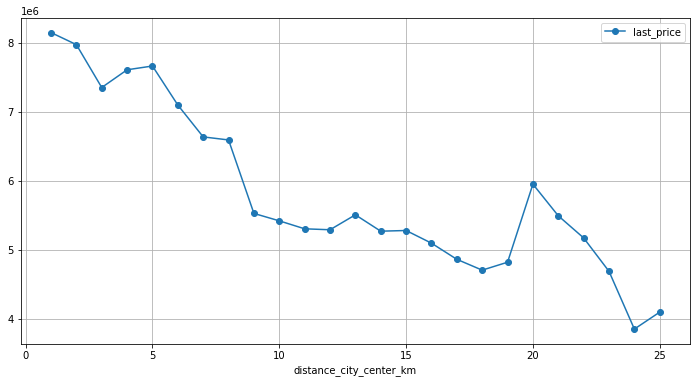

In [130]:
# (1) сохраним предобработанный датафрейм в переменной distance_price

distance_price = data

# (2) повторим срез данных для параметров 'last_price', 'city_centers_nearest'

distance_price = distance_price.query('last_price > 430_000 & last_price < 11_875_000')
distance_price = distance_price.query('city_centers_nearest > 500 & city_centers_nearest < 25000')

# (3) выберем населённый пункт "санкт-петербург" для анализа

spb_distance_price = distance_price.loc[distance_price['locality_name'] == 'санкт-петербург']

# (4) вычислим среднюю стоимость каждого километра 

(
    spb_distance_price
    .pivot_table(index='distance_city_center_km', values='last_price', aggfunc='mean')
    .plot(style='o-',
          grid=True,
          figsize=(12,6))
)

**<u>ВЫВОД:</u>**

На графике прослеживается ярко выраженная **обратная связь** между ценой квартиры и расстоянием до центра города: с увеличением расстояния цена квартиры, как правило, падает, но есть исключения. Можно выделить **4 сегмента** объектов недвижимости в Санкт-Петербурге:

* **ближайшие объекты к центру (1-8 км):** цена квартиры очень высокая, так как центр города находится практически в пешей доступности, в районе имеется развитая инфраструктура, отличная транспортная доступность, рядом множество парков, культурных и исторических объектов, также немаловажную роль играет сам статус района;

* **обжитые спальные районы (9-19 км):** цена квартир намного ниже, в основном здесь представлен старый фонд в виде многоэтажных домов типового проекта в перемешку с отдельными новостройками, инфраструктура хорошо развита, поездка в центр города занимает время, но оно не критично

* **спальные районы: ближняя окраина (20-23 км):** цена квартир выше, чем в обжитых спальных районах, здесь располгаются новостройки и коттеджные посёлки, районы застраиваются в соответствии с современными тенденциями, но есть проблемы в виде недосточно развитой инфраструктуры и средней транспортной доступности;

* **дальняя окраина (24-25 км):** самая низкая цена, многие объекты де-факто располагаются в пригороде вдоль шоссе или на отшибе, транспортная доступность и инфраструктура на низшем уровне, возможно соседство с ТЭЦ, заводами, водоочистными сооружениями и прочими промышленными объектами.

## 5 Общий вывод

Для заказчика было проведено исследование объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Цель исследования заключалась в установлении параметров, влияющих на рыночную стоимость объектов недвижимости.

Для анализа заказчик предоставил файл в CSV-формате с двумя видами данных. Первые были вписаны пользователем, вторые — получены автоматически на основе картографических данных. В файле были представлены следующие данные:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Сначала был проведён первичный анализ данных, где были выявлены проблемы в виде пропущенных значений, несоответствия типа данных столбцов описанию из документации, наличия неявных дубликатов и т.д. Подробнее см. **[Результаты и выявленные проблемы первичного анализа данных](#firstresults)**.

Затем проведена предобработка данных, после которой стало возможным использовать датафрейм для исследовательского анализа. Подробнее см. **[Результаты предобработки данных](#preprocessingresults)**.

Далее в датафрейм было добавлено **6 новых столбцов:**

* `price_per_square_meter` (цена одного квадратного метра)
* `day_publication` (день недели публикации объявления)
* `month_publication` (месяц публикации объявления)
* `year_publication` (год публикации объявления)
* `floor_type` (тип этажа квартиры)
* `distance_city_center_km` (расстояние до центра города в километрах)

На этапе исследовательского анализа были изучены основные параметры из **[списка](#parameters)** и устранены выбросы . Для каждого параметра построены гистограмма и диаграмма размаха, сформулированы выводы.

Сформулирован ответ на **вопрос № 1** заказчика: ***Сколько времени обычно занимает продажа квартиры? Какие продажи можно считать быстрыми, а какие — необычно долгими?***

<u>**Ответ:**</u>

**В среднем продажа квартиры занимает 2-3 месяца**, если исходить из полученных значений среднего арифметического и медианы. Скорость продажи зависит не только от рассмотренных ранее параметров (площадь, этаж, удалённость от центра и т.д.), но ещё и от состояния квартиры, инфраструктуры, транспортной доступности и пр. **Быстрыми** можно считать продажи, которые были осуществлены **в течение 2 месяцев** с момента публикации объявления, а **долгими** - те, которые находятся за пределами 3 квартиля (Q3) т. е. **более 4-5 месяцев**, а **необычно долгими** - те, которые находятся за границами 1,5 межквартильного размаха (1,5 * IQR) т. е. **более 8-9 месяцев** (на их долю приходится примерно 20% от всей выборки).

---
Сформулирован ответ на **вопрос № 2** заказчика: ***Какие факторы больше всего влияют на общую (полную) стоимость объекта?***

<u>**Ответ:**</u>

**Факторы, оказывающие СИЛЬНОЕ влияние на цену квартиры (`last_price`):**

* количество комнат (`rooms`);
* общая площадь (`total_area`);
* тип этажа, на котором расположена квартира (первый, последний, другой) (`floor_type`);
* месяц размещения объявления (`month_publication`);

**Факторы, оказывающие СЛАБОЕ влияние на цену квартиры (`last_price`):**

* день размещения объявления (`day_publication`);
* жилая площадь (`living_area`).

**Факторы, НЕ влияющие на цену квартиры (`last_price`):**

* площадь кухни (`kitchen_area`);

**Факторы, оказывающие влияние при определённых событиях и обстоятельствах**:

* год размещения объявления (`year_publication`).

---
Сформулирован ответ на **вопрос № 3** заказчика: ***Какова средняя цена одного квадратного метра (1 м²) в населённых пунктах с наибольшим числом объявлений (топ-10)?***

<u>**Ответ:**</u>

В списке топ-10 населённых пунктов помимо Санкт-Петербурга в основном представлены города и посёлки, которые де-юре являются частью города Санкт-Петербурга, либо находятся в непосредственнной близости от него. Исключение - город Выборг, данный населённый пункт находится в 100 км от Санкт-Петербурга. Результаты анализа:

**Самая высокая средняя цена 1 м²:** Санкт-Петербург (105 707 руб.)

**Самая низкая средняя цена 1 м²:** Выборг (58 192 руб.)

In [131]:
price_per_square_meter_top_ten

,price_per_square_meter
locality_name,
санкт-петербург,"105,707.31"
пушкин,"100,462.06"
кудрово,"95,086.98"
посёлок парголово,"90,332.26"
мурино,"86,041.12"
посёлок шушары,"78,578.07"
колпино,"75,221.88"
гатчина,"68,664.04"
всеволожск,"67,222.43"


---
Сформулирован ответ на **вопрос № 4** заказчика: ***Как стоимость объектов недвижимости в Санкт-Петербурге зависит от расстояния до центра города?***

<u>**Ответ:**</u>

С увеличением расстояния цена квартиры, как правило, падает, но есть исключения. Можно выделить **4 сегмента** объектов недвижимости в Санкт-Петербурге:

* **ближайшие объекты к центру (1-8 км):** цена квартиры очень высокая, так как центр города находится практически в пешей доступности, в районе имеется развитая инфраструктура, отличная транспортная доступность, рядом множество парков, культурных и исторических объектов, также немаловажную роль играет сам статус района;

* **обжитые спальные районы (9-19 км):** цена квартир намного ниже, в основном здесь представлен старый фонд в виде многоэтажных домов типового проекта в перемешку с отдельными новостройками, инфраструктура хорошо развита, поездка в центр города занимает время, но оно не критично

* **спальные районы: ближняя окраина (20-23 км):** цена квартир выше, чем в обжитых спальных районах, здесь располгаются новостройки и коттеджные посёлки, районы застраиваются в соответствии с современными тенденциями, но есть проблемы в виде недосточно развитой инфраструктуры и средней транспортной доступности;

* **дальняя окраина (24-25 км):** самая низкая цена, многие объекты де-факто располагаются в пригороде вдоль шоссе или на отшибе, транспортная доступность и инфраструктура на низшем уровне, возможно соседство с ТЭЦ, заводами, водоочистными сооружениями и прочими промышленными объектами.

**РЕЗУЛЬТИРУЮЩИЙ ВЫВОД**:

В результате исследования были установлены параметры, которые оказывают наибольшое влияние на рыночную стоимость квартир в Санкт-Петербурге и соседних населённых пунктах. В основном цена объекта зависит от количества комнат, общей площади, этажа, места расположения и расстояния до центра города (если мы говорим о Санкт-Петербурге). Немаловажным фактором является месяц, когда было размещено объявление о продаже, а также ситуация на рынке недвижимсоти. Теперь нам известно, что самую большую выгоду от продажи квартиры можно получить при выполнении следующих условий: 

* у квартиры большая общая площадь и большое количество комнат;
* квартира находится на любом этаже, кроме первого и последнего;
* расположение квартиры - Санкт-Петербург и не более 8 км от центра города;
* объявление о продаже квартиры размещено в апреле;
* квартира продаётся при отсутсвии кризиса на рынке недвижимости.

Наименьшая выгода ожидает продавца, если:

* квартира маеленькая (квартира-студия или 1-комнатная квартира);
* квартира находится на первом этаже;
* расположение квартиры - Выборг;
* объявление о продаже квартиры размещено в июне;
* квартира выставлена на продажу во время кризиса на рынке недвижимости, вызванного внешними факторами.

Результаты проведённого исследования можно использовать для построения автоматизированной системы, которая сможет отслеживать аномалии и мошенническую деятельность, но стоит учитывать следующее: существует вероятность того, что не все вышеизложенные факторы могут совпасть, а лишь только их часть. Одной из причин этому могут послужить пропущенные значения и неявные дубликаты в предоставленной таблице с данными. Для улучшения качества данных (касаемо тех данных, которые были получены от пользователей) в будущем необходимо по возможности сделать все поля для заполнения обязательными и добавить автопроверку на формат вводимых значений. Поле с указанием населённого пункта должно иметь выпадающий список, где без труда можно найти официальное название места, где продаётся объект. Предпринятый комплекс мер позволит не только сократить время для будущих анализов, но и сделает сервис Яндекс.Недвижимость более удобным для пользователей.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод